In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('/Users/matiasochoa/Documents/Ms Data Science For Finance/Regulacion y Riesgos/Data.xlsx')

## <u>Exploratory Analysis<u>

In [103]:
df = data
df.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,65741,C0573585864305125F90E25,869907,2013-08-14 19:43:24.950,NaN,36,Past Due (91-120 days),NaT,0.35356,0.3134,...,-6.63,0.0,0.00,0.00,0.0,1.0,0,0,0.0,26
1,45951,3AA335623271910025095F1,670472,2012-11-15 12:00:48.240,NaN,36,Defaulted,2013-06-01,0.25781,0.2199,...,-4.11,0.0,4899.44,4899.44,0.0,1.0,0,0,0.0,44
2,42141,F3B83598467206947541695,1126680,2014-01-08 13:06:45.580,NaN,36,Current,NaT,0.20933,0.1725,...,-15.29,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
3,82609,4359358421194114874F597,847661,2013-07-23 03:27:07.183,NaN,36,Current,NaT,0.14857,0.1203,...,-21.91,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
4,82726,C88933828786827966B4BCD,101898,2007-02-20 17:31:48.383,HR,36,Chargedoff,2008-03-06,0.24507,0.2300,...,-11.55,0.0,1738.72,1738.73,0.0,1.0,0,0,0.0,78


In [104]:
df.shape

(79756, 82)

In [105]:
df.dtypes


Unnamed: 0                              int64
ListingKey                             object
ListingNumber                           int64
ListingCreationDate            datetime64[ns]
CreditGrade                            object
                                    ...      
PercentFunded                         float64
Recommendations                         int64
InvestmentFromFriendsCount              int64
InvestmentFromFriendsAmount           float64
Investors                               int64
Length: 82, dtype: object

In [106]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,79756.0,56906.983575,0.0,28447.5,56859.5,85451.25,113936.0,32899.517321
ListingNumber,79756.0,628148.530242,4.0,402127.5,601038.0,892592.25,1255725.0,327935.742766
ListingCreationDate,79756,2011-07-10 08:42:04.052740096,2005-11-09 20:44:28.847000,2008-09-22 06:59:10.697499904,2012-06-18 10:46:02.266500096,2013-09-09 18:52:29.287000064,2014-03-10 12:20:53.760000,NaN
Term,79756.0,40.829129,12.0,36.0,36.0,36.0,60.0,10.424521
ClosedDate,38470,2011-03-07 18:40:15.943508736,2005-11-25 00:00:00,2009-07-14 00:00:00,2011-04-03 00:00:00,2013-01-29 00:00:00,2014-03-10 00:00:00,NaN
...,...,...,...,...,...,...,...,...
PercentFunded,79756.0,0.998592,0.7,1.0,1.0,1.0,1.011,0.017937
Recommendations,79756.0,0.046166,0.0,0.0,0.0,0.0,19.0,0.297272
InvestmentFromFriendsCount,79756.0,0.022431,0.0,0.0,0.0,0.0,15.0,0.198574
InvestmentFromFriendsAmount,79756.0,16.676687,0.0,0.0,0.0,0.0,25000.0,297.586937


In [107]:
nulos = df.isnull().sum()
cols_con_nulos = nulos[nulos > 0]/len(df)


print(cols_con_nulos)

CreditGrade                            0.746552
ClosedDate                             0.517654
BorrowerAPR                            0.000238
EstimatedEffectiveYield                0.254514
EstimatedLoss                          0.254514
EstimatedReturn                        0.254514
ProsperRating (numeric)                0.254514
ProsperRating (Alpha)                  0.254514
ProsperScore                           0.254514
BorrowerState                          0.048310
Occupation                             0.031571
EmploymentStatus                       0.019973
EmploymentStatusDuration               0.067130
GroupKey                               0.882228
CreditScoreRangeLower                  0.005191
CreditScoreRangeUpper                  0.005191
FirstRecordedCreditLine                0.005981
CurrentCreditLines                     0.067029
OpenCreditLines                        0.067029
TotalCreditLinespast7years             0.005981
InquiriesLast6Months                   0

In [108]:
nulos_columna = df.isnull().mean(axis=0)

# Columnas que tienen más del 75%
columnas_con_nulos = nulos_columna[nulos_columna > 0.75].index
columnas_con_nulos = columnas_con_nulos.tolist()
columnas_con_nulos = [col for col in columnas_con_nulos if col != 'LoanFirstDefaultedCycleNumber']

print(f"Columnas Eliminadas: {columnas_con_nulos}")

df = df.drop(columnas_con_nulos, axis=1)

df['LoanFirstDefaultedCycleNumberQ'] = (df['LoanFirstDefaultedCycleNumber'] / 4).round()

df['LoanMonthsSinceOriginationY'] = (df.LoanMonthsSinceOrigination / 12).round()

num_features = df.select_dtypes(include=['number']).describe().T.index
cat_features = df.select_dtypes(include=['object', 'category']).describe().T.index

Columnas Eliminadas: ['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing']


In [109]:
print(df['Unnamed: 0'].duplicated().sum())
df = df.drop(['Unnamed: 0','ListingKey','ListingNumber','MemberKey','LoanKey'],axis=1)

0


In [110]:
df.select_dtypes(include=['object', 'category']).describe().T

,count,unique,top,freq
CreditGrade,20214,8,C,3951
LoanStatus,79756,12,Current,39667
ProsperRating (Alpha),59457,7,C,12990
BorrowerState,75903,51,CA,10318
Occupation,77238,67,Other,19990
EmploymentStatus,78163,8,Employed,47146
IncomeRange,79756,8,"$25,000-49,999",22455
LoanOriginationQuarter,79756,33,Q4 2013,10140


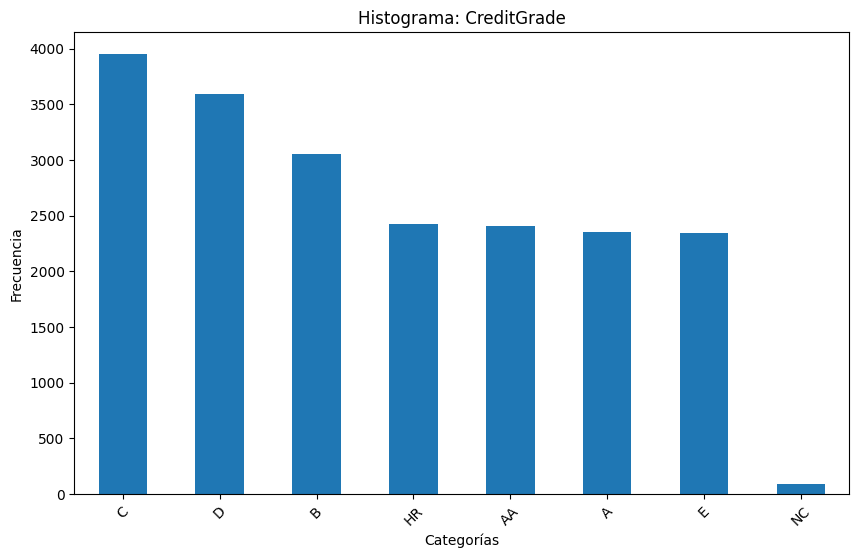

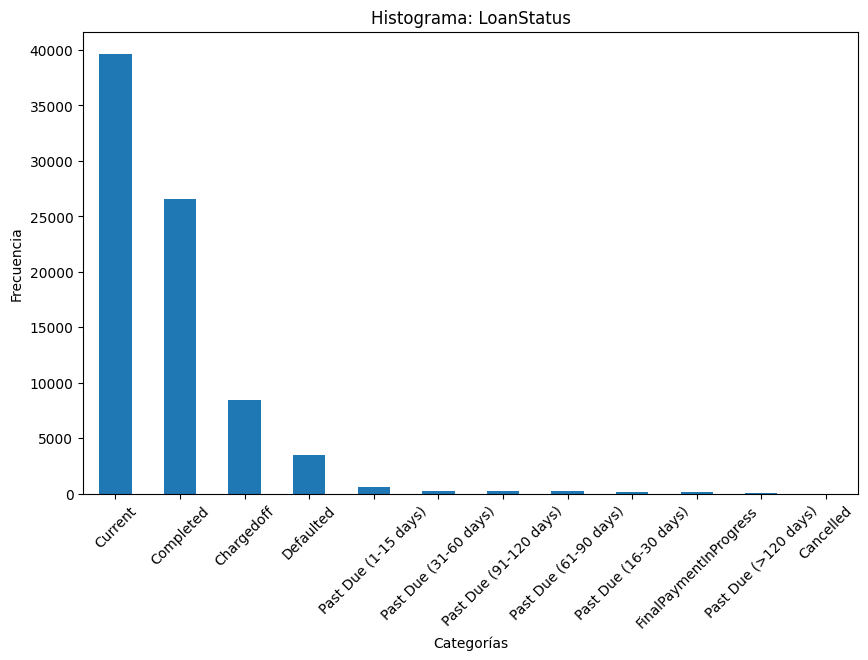

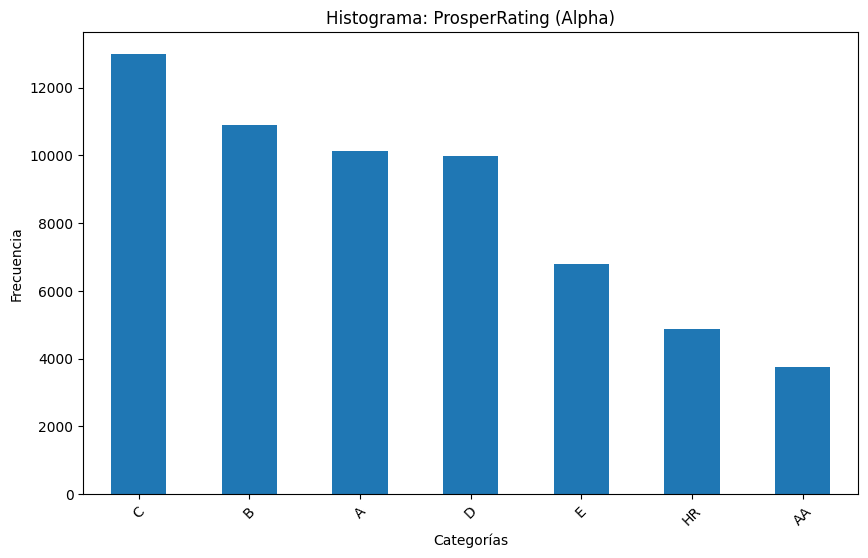

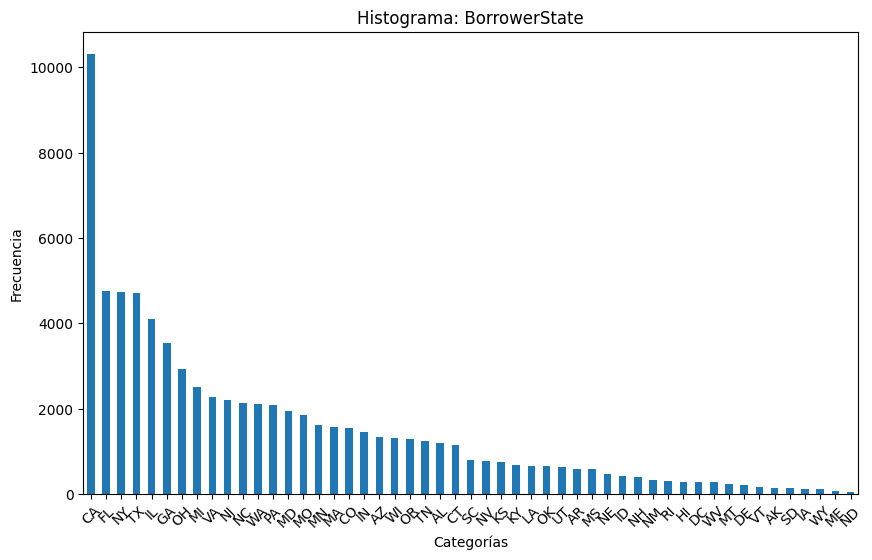

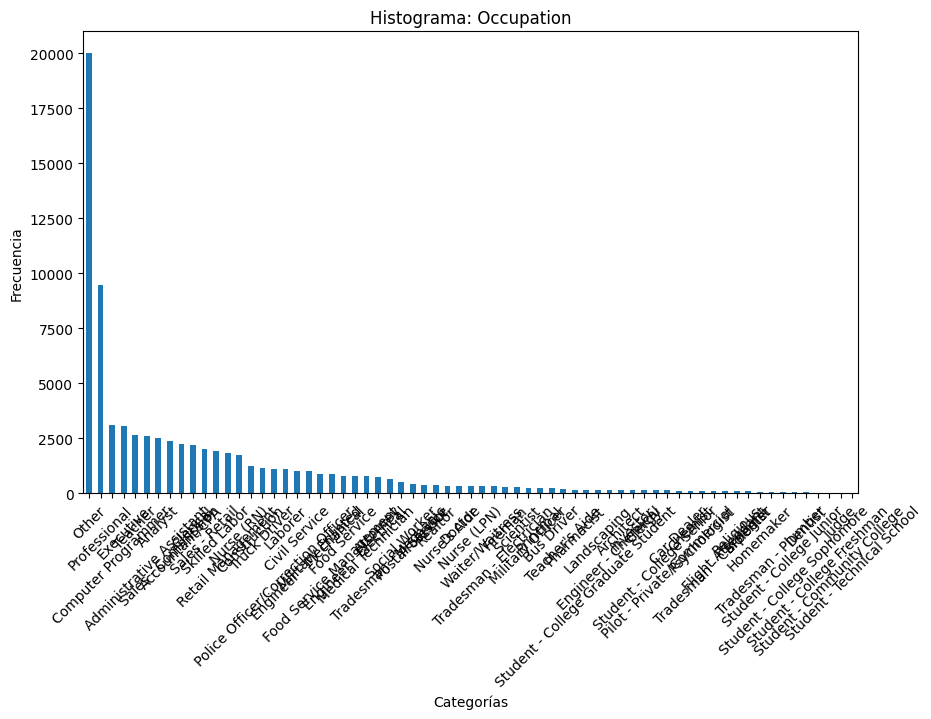

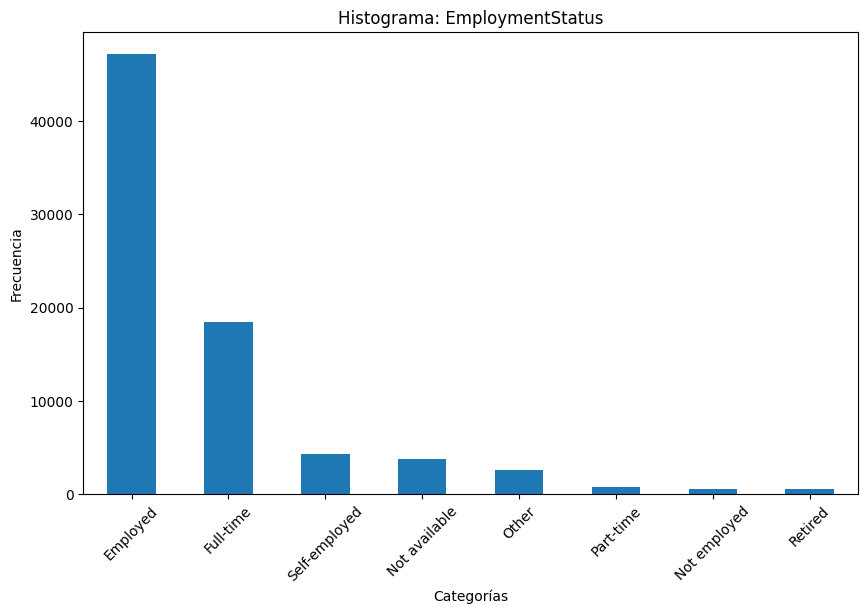

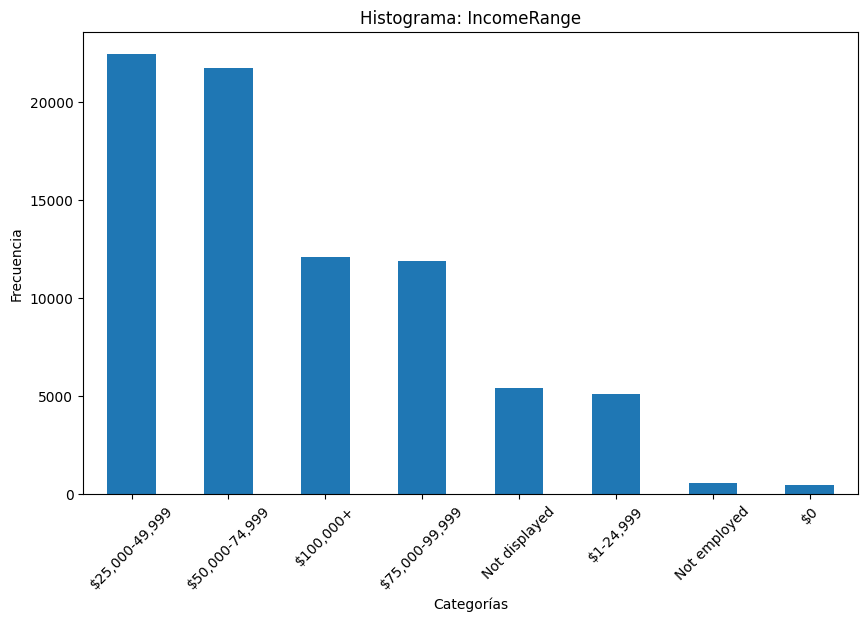

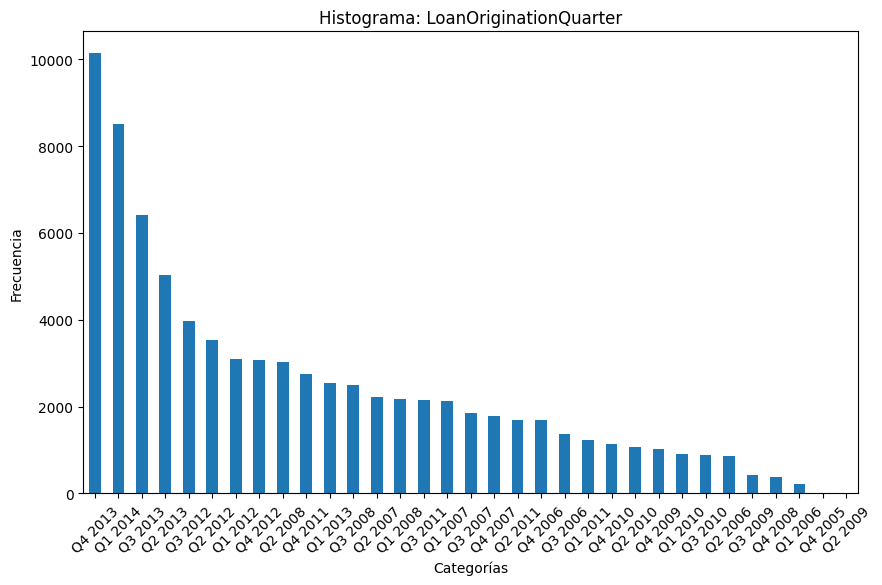

In [111]:
df_categoricas = df.select_dtypes(include=['object', 'category'])

# Creamos un histograma para cada columna categórica
for col in df_categoricas.columns:
    plt.figure(figsize=(10, 6))
    df_categoricas[col].value_counts().plot(kind='bar')
    plt.title(f'Histograma: {col}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


## <u>Vintage Analysis + PW & OW<u>

In [112]:
# Capture volume per months since origination
    # Handle LoanMonthsSinceOriginationY in years
df['LoanMonthsSinceOriginationY'] = (df.LoanMonthsSinceOrigination / 12).round()
    # Handle LoanFirstDefaultedCycleNumber in quarters
df['LoanFirstDefaultedCycleNumberQ'] = (df.LoanFirstDefaultedCycleNumber / 4).round()
# Get number of loans per years since origination
df_vintage_aux = (df.groupby('LoanMonthsSinceOriginationY')
                   .agg({'LoanMonthsSinceOriginationY': 'size'})
                   .rename(columns={'LoanMonthsSinceOriginationY': 'N_loans'})
                   .reset_index()
                )
### Capture number of bads per LoanMonthsSinceOrigination, and LoanFirstDefaultedCycleNumber
df['bad_aux'] = ~df['LoanFirstDefaultedCycleNumber'].isna()
# Get number of bads per quarter by year
df_def_per_cycle = (pd.DataFrame(
                        df.groupby(['LoanMonthsSinceOriginationY', 'LoanFirstDefaultedCycleNumberQ'])['bad_aux']
                          .sum()
                          .groupby(level=[0])
                          .cumsum())
                          .reset_index()
                   )
# Substitute variable bad_aux by N_bads
df_def_per_cycle.columns = df_def_per_cycle.columns[:-1].tolist() +  ['N_bads']
# Obtain number of loans and bad loans per year
df_vintage = df_vintage_aux.merge(df_def_per_cycle, on='LoanMonthsSinceOriginationY')
# Bad Rate
df_vintage['BR'] = 100. * df_vintage['N_bads'] / df_vintage['N_loans']
# Get BR per year of origination
df_vin_pvt = df_vintage.pivot(index='LoanMonthsSinceOriginationY', columns='LoanFirstDefaultedCycleNumberQ', values='BR')
df_vin_pvt2 = df_vintage_aux.merge(df_vin_pvt, on='LoanMonthsSinceOriginationY', how='left')

In [113]:
df_vin_pvt

LoanFirstDefaultedCycleNumberQ,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
LoanMonthsSinceOriginationY,,,,,,,,,,,
0.0,NaN,0.004794,0.014381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,0.013474,0.080846,2.189584,2.944149,3.361854,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.049691,0.447221,5.522822,8.305530,12.280826,13.892241,15.141620,15.319089,15.326187,NaN,NaN
3.0,0.567974,1.080982,6.082814,8.739465,12.385489,14.126053,16.617809,17.900330,19.109564,19.311103,NaN
4.0,1.194831,1.560595,4.364789,5.925384,8.558888,9.900024,12.070227,13.069983,14.679347,15.264570,15.947330
5.0,0.869565,NaN,5.739130,10.434783,14.608696,16.173913,19.478261,21.217391,22.608696,23.478261,24.347826
6.0,1.379172,1.978813,8.504897,12.972217,20.367779,23.625825,27.833300,29.762143,32.130722,33.100140,34.429342
7.0,2.011690,2.963164,13.198315,18.798423,24.983009,28.340356,33.260840,35.598749,38.616284,39.948349,41.334783
8.0,1.215559,2.552674,10.899514,15.680713,22.649919,25.688817,29.781199,31.361426,33.549433,35.089141,36.547812


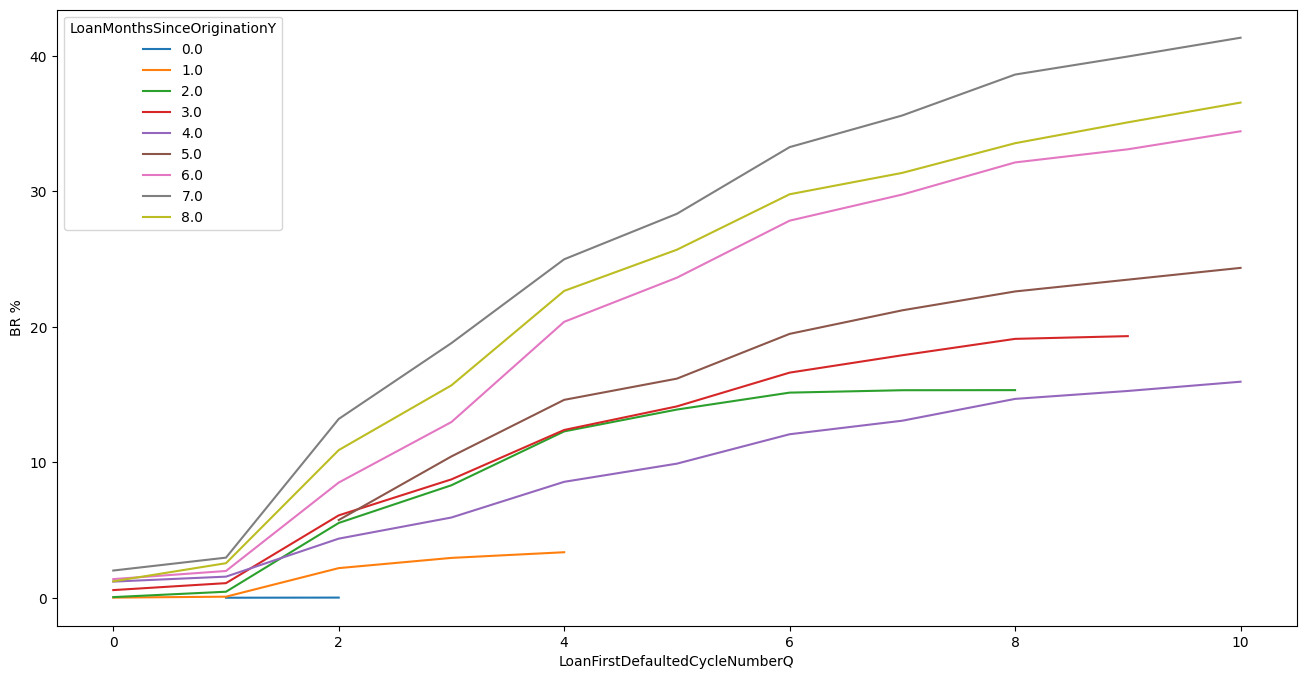

In [114]:
import matplotlib.pyplot as plt
df_vin_pvt.transpose().plot(figsize=(16, 8))
plt.ylabel('BR %');

#### Existe un cambio de politica dado que la Bad Rate tiene un salto anormal en los creditos originados hace mas de 6 años

In [115]:
def generate_pop_flags(df, PW_size=12, TH_fraud=1):
    """Generates fraud, bad, and indeterminate columns
    Args:
        df: Pandas DataFrame with the input data
        PW_size: Int Performance window size (months)
        TH_fraud: Int number of quarters used as threshold for fraud
    Returns:
        Pandas DataFrame with the columns that capture population and bad
    """
    # PW maturity - only those with 12 months of loan since origination
    df['population'] = df.LoanMonthsSinceOrigination >= PW_size
    # Fraud
    #df['fraud'] = df.LoanFirstDefaultedCycleNumber <= TH_fraud
    # Bad
    #df['bad'] = (df.LoanFirstDefaultedCycleNumber > TH_fraud) & (df.LoanFirstDefaultedCycleNumber <= PW_size)
    # Obtain defaulted loads in PW months Performance Window
    df['bad'] = (df.LoanFirstDefaultedCycleNumber > 0) & (df.LoanFirstDefaultedCycleNumber <= PW_size)
    # Indeterminates
    #df['indeterm'] = (df.LoanFirstDefaultedCycleNumber > PW_size)
    #df.loc[(df.bad == 0) & (df.LoanCurrentDaysDelinquent > 30), 'indeterm'] = True
    return df

In [116]:
for PW_eval in [6, 12, 16, 24]:
    print('For a {}-month-PW we have the following numbers:'.format(PW_eval))
    df = generate_pop_flags(df, PW_eval)
    pop = df[df.population==True].shape[0]
    bad = df[(df.population==True)&(df.bad_aux==True)].shape[0]
    bad_PW = df[(df.population==True)&(df.bad==True)].shape[0]
    print('   Population: {}'.format(pop))
    print('   Total Number of Bads: {}'.format(bad))
    print('   Total Number of Bads captured in PW: {}'.format(bad_PW))
    print('   Bad Rate: {}'.format(100*bad_PW/pop))
    print('   % Bad: {}'.format(100*bad_PW/bad))
    print('\n')

For a 6-month-PW we have the following numbers:
   Population: 61109
   Total Number of Bads: 11896
   Total Number of Bads captured in PW: 1137
   Bad Rate: 1.8606097301543145
   % Bad: 9.557834566240754


For a 12-month-PW we have the following numbers:
   Population: 49663
   Total Number of Bads: 11760
   Total Number of Bads captured in PW: 4705
   Bad Rate: 9.473853774439723
   % Bad: 40.00850340136054


For a 16-month-PW we have the following numbers:
   Population: 46305
   Total Number of Bads: 11603
   Total Number of Bads captured in PW: 6598
   Bad Rate: 14.249001187776697
   % Bad: 56.86460398172886


For a 24-month-PW we have the following numbers:
   Population: 36548
   Total Number of Bads: 10356
   Total Number of Bads captured in PW: 8063
   Bad Rate: 22.061398708547664
   % Bad: 77.85824642719197




In [117]:
PW_eval = 16
df = generate_pop_flags(df, PW_eval)

#### Nos quedariamos con una Performance Window de 16-Months dado que la cantidad de Bads capturados en la PW aumenta  mejorando la Bad Rate contra la PW anterior, y no elegimos la de 24 porque si bien capturamos un % de Bad mayor, <u>esto es porque se redujo la poblacion y no porque estemos capturando mas Bads<u>

In [118]:
filter_cond = df.population
df_pop = df.loc[filter_cond]

In [119]:
df['LoanOriginationYear'] = df['LoanOriginationDate'].dt.year
df_pop['LoanOriginationYear'] = df['LoanOriginationDate'].dt.year

In [120]:
def describe_yearly_BR(df, col_year='LoanOriginationYear', col_target='bad'):
    """Describes the yearly number of loans, bad loans and bad rate of the portfolio
    Args:
    df: Pandas DataFrame with the input data
    col_year: Name of the column that captures the loan origination date
    col_target: Name of the target column
    Returns:
    Pandas DataFrame with the yearly number of loans, bad
    loans and bad rate of the portfolio
    """
    n_loans_series = df.groupby(col_year).size()
    n_bads_series = df.groupby(col_year)[col_target].sum()
    df_desc = pd.DataFrame({'N_loans': n_loans_series,
    'N_bads': n_bads_series})[['N_loans', 'N_bads']]
    df_desc['BR'] = 100. * df_desc.N_bads / df_desc.N_loans
    return df_desc
display(describe_yearly_BR(df_pop, col_year='LoanOriginationYear', col_target='bad'))

,N_loans,N_bads,BR
LoanOriginationYear,,,
2005,16,0,0.000000
2006,4141,926,22.361748
2007,7977,1612,20.208098
2008,8073,1411,17.478013
2009,1443,100,6.930007
2010,3989,325,8.147405
2011,7819,873,11.165111
2012,12847,1351,10.516074


#### La caida en la BR a partir del año 2009 muestra un claro cambio en las politicas, por lo cual el resto de las observaciones ya no son representativas de la realidad

## <u>Validation Sample<u>

#### Vamos a dejar 2009,2010 para test dado que tienen menos Bads por lo que el modelo deberia de generalizar mejor si se lo entrena con mayores observaciones para generalizar

In [121]:
df_pop_it = df_pop.loc[(df_pop.LoanOriginationYear >= 2011)]
df_oot = df_pop.loc[(df_pop.LoanOriginationYear < 2011)]

df_train = df_pop_it.sample(frac=0.7, random_state=42)
df_val = df_pop_it.loc[~df_pop_it.index.isin(df_train.index)]

df = df_train


In [122]:
print('TRAINING SAMPLE:')
print(' Population: {}'.format(df_train[df_train.population == True].shape[0]))
print(' Total Number of Bads: {}'.format(df_train[(df_train.population == True) & (df_train.bad == True)].shape[0]))
print(' Bad Rate: {:.2f}%'.format(100 * df_train[(df_train.population == True) & (df_train.bad == True)].shape[0] / 
                                  df_train[df_train.population == True].shape[0]))
print('\n')

print('OOS:')
print(' Population: {}'.format(df_val[df_val.population == True].shape[0]))
print(' Total Number of Bads: {}'.format(df_val[(df_val.population == True) & (df_val.bad == True)].shape[0]))
print(' Bad Rate: {:.2f}%'.format(100 * df_val[(df_val.population == True) & (df_val.bad == True)].shape[0] / 
                                  df_val[df_val.population == True].shape[0]))
print('\n')

print('OOT:')
print(' Population: {}'.format(df_oot[df_oot.population == True].shape[0]))
print(' Total Number of Bads: {}'.format(df_oot[(df_oot.population == True) & (df_oot.bad == True)].shape[0]))
print(' Bad Rate: {:.2f}%'.format(100 * df_oot[(df_oot.population == True) & (df_oot.bad == True)].shape[0] / 
                                  df_oot[df_oot.population == True].shape[0]))
print('\n')


TRAINING SAMPLE:
 Population: 14466
 Total Number of Bads: 1566
 Bad Rate: 10.83%


OOS:
 Population: 6200
 Total Number of Bads: 658
 Bad Rate: 10.61%


OOT:
 Population: 25639
 Total Number of Bads: 4374
 Bad Rate: 17.06%




## <u>Define Target<u>

#### La seleccionamos en base a si las columnas que tenemos la definen o la explican

In [123]:
drop = ['CreditGrade', #data not filled post 2009
'BorrowerRate', #RATE: price is set after risk assesment
'LenderYield', #Yield: int rate less servicing fee
'EstimatedEffectiveYield', #prosper model generated data
'EstimatedLoss', #prosper model generated data
'EstimatedReturn', #prosper model generated data
'ProsperRating (numeric)', #prosper model generated data
'CurrentlyInGroup', #post origination date
'GroupKey', #ID
'DateCreditPulled', #drop - date when credit score was pulled
'FirstRecordedCreditLine', #need to transform from date to numeric
'LoanKey', #ID
'LoanCurrentDaysDelinquent', #part of target definition, post origination date
'LoanFirstDefaultedCycleNumber', #part of target definition, post origination date
'LoanMonthsSinceOrigination', #part of target definition, post origination date
'LoanNumber', #ID
'LoanOriginationDate', #RAW date
'LoanOriginationQuarter', #REVIEW
'MemberKey', #ID
'LP_CustomerPayments', #post origination date
'LP_CustomerPrincipalPayments', #post origination date
'LP_InterestandFees', #post origination date
'LP_ServiceFees', #post origination date
'LP_CollectionFees', #post origination date
'LP_GrossPrincipalLoss', #post origination date
'LP_NetPrincipalLoss', #post origination date
'LP_NonPrincipalRecoverypayments',#post origination date
'ListingKey', #ID
'ListingNumber', #ID
'ListingCreationDate', #Creation date
'LoanStatus', #post origination date
'ClosedDate', #post origination date
'BorrowerAPR', #price is set after risk assesment
'ProsperRating (Alpha)', #price is set after risk assesment
'ProsperScore', #prosper model generated data
'CurrentDelinquencies', #post origination date
'AmountDelinquent', #post origination date
'InvestmentFromFriendsCount', #post listing date
'InvestmentFromFriendsAmount', #post listing date
'Investors', #post listing date
'PW', #PW flag - drop
'fraud', #fraud flag - drop
'indeterm', #indeterm flag - drop
'LoanOriginationYear', #origination date - drop
'LoanMonthsSinceOriginationY', #post origination date
'LoanFirstDefaultedCycleNumberQ', #post origination date
'bad_aux', #bad flag - drop
'population'
]
features = [c for c in df.columns if c not in drop]
col_target = 'bad'

In [124]:
DTI_informed = df.loc[~df.DebtToIncomeRatio.isna()]
DTI_missing = df.loc[df.DebtToIncomeRatio.isna()]


In [125]:
DTI_missing[['StatedMonthlyIncome','DebtToIncomeRatio']]

,StatedMonthlyIncome,DebtToIncomeRatio
74107,8000.000000,NaN
40032,3333.333333,NaN
22483,0.000000,NaN
67972,2000.000000,NaN
48484,4166.666667,NaN
...,...,...
33695,2083.333333,NaN
68799,5000.000000,NaN
39345,1666.666667,NaN
17338,5666.666667,NaN


In [126]:
print('Population with informed DTI: {:,}'.format(DTI_informed[(DTI_informed.population==True)].shape[0]))
print('Bad Rate within informed DTI population: {:.2f}%'.format(DTI_informed[DTI_informed.population == 1]['bad'].mean() * 100))
print('Population with missing DTI: {:,}'.format(DTI_missing[(DTI_missing.population==True)].shape[0]))
print('Bad Rate within missing DTI population: {:.2f}%'.format(DTI_missing[DTI_missing.population == 1]['bad'].mean() * 100))

Population with informed DTI: 12,892
Bad Rate within informed DTI population: 9.99%
Population with missing DTI: 1,574
Bad Rate within missing DTI population: 17.66%


## <u> Information Value & Population Stability Index (IV - PSI)

In [127]:
#visualization functions
def capture_df(feat_col, input_slider, n_bins, df, target_col):
    """
    Handles the type of the data to generate the intermediate datadframe
    """
    if df[feat_col].dtype in [int, float, np.number]:
        return df_vol_br_num(feat_col, input_slider, n_bins, df, target_col)
    
    else:
        return df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col)
    

#capture volume / BR df for numerical variables
def df_vol_br_num(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the intermediate dataframe with number of observations and
    number of bads per bin. Specific for numerical features.
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider] # lista de 2 posiciones con los percentiles que queremos
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values # me devuelve el valor de la columna corresp
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[obj_col, feat_col]] # me filtro "outliers"
    #number of cuts = minumum of n_bins, number of unique values of the variable
    n_cuts = min(int(n_bins), df_cut[feat_col].nunique())
    cuts = [c for c in np.linspace(v_min, v_max, n_cuts + 1)] # vector for delimiting cuts
    if cuts[-1] < v_max: # add if linspace not performed perfectly
        cuts.append(v_max)
    cut_col = feat_col + '_'
    df_cut[cut_col] = pd.cut(df_cut[feat_col], cuts, include_lowest=True) # transforma el valor de la columna en el bin
        # print(df_cut)
        #generate aggregated values
    N = df_cut.groupby(cut_col)[feat_col].count().values
    BR = df_cut.groupby(cut_col)[obj_col].mean().values
    cuts = df_cut.groupby(cut_col)[feat_col].count().index.astype(str).values
    #handle NA entries -> add a first value fo Nans in bins
    if df[feat_col].isna().sum() > 0:
        N = np.append(([df[feat_col].isna().sum()]), N)
        BR = np.append(([df.loc[df[feat_col].isna()][obj_col].mean()]), BR)
        cuts = np.append(['NA'], cuts)
    #generate global transformation rate
    return (pd.DataFrame({'cuts': cuts,'N': N,'BR': BR}), df_cut[obj_col].mean())


#capture volume / BR df for categorical variables
def df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col):
    """
    Generate the intermediate dataframe with number of observations and
    number of bads per bin. Specific for categorical features.
    """
    #pick top n_bins levels by volume
    cut_levels = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()
    df_cut = df.loc[df[feat_col].isin(cut_levels)]
    #capture volumes
    N = df_cut.groupby(feat_col)[feat_col].count().values
    #capture transformations
    BR = df_cut.groupby(feat_col)[target_col].mean().values
    return (pd.DataFrame({'cuts': df_cut.groupby(feat_col)[feat_col].count().index.astype(str).values,
    'N': N,
    'BR': BR}), df_cut[target_col].mean())


def output_graph_update(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the plotly plot showing the visualization of the intermediate
    dataframe with volume and bad rate per bin.
    """
    #get the df with volume and bad rate
    df_tr, avg_tr = capture_df(feat_col, input_slider, n_bins, df, obj_col)
    #line represents transformation rate
    tr_line = go.Scatter(x = df_tr.cuts,
    y = df_tr.BR,
    yaxis = 'y2',
    name = 'BR')
    #bar represents volume @ cut
    vol_bars = go.Bar(x = df_tr.cuts,
    y = df_tr.N,
    name = 'Volume')
    #avg line
    avg_line = go.Scatter(x = df_tr.cuts,
    y = np.repeat(avg_tr, df_tr.shape[0]),
    yaxis = 'y2',
    name = 'AVG BR',
    line = dict(
    color = ('rgb(205, 0, 0)')
    )
    )
    #small layout
    layout = go.Layout(
    title = 'BR for ' + feat_col,
    yaxis = dict(title = 'Volume',
    range = [0, max(df_tr.N)]),
    yaxis2 = dict(title = 'BR',
    overlaying='y',
    side='right',
    range = [0, max(df_tr.BR) + 0.05*max(df_tr.BR)])
    )
    return {'data': [vol_bars,tr_line, avg_line],
    'layout': layout}

def get_iv(df_vbr, col_target='Default'):
    """Returns the IV (Information Value).
    Args:
    df_vbr: Pandas DataFrame, containing volume counts and bad counts
    col_target: Name of the target column
    Returns:
    Estimated IV
    """
    #calculate the IV
    #bin-wise good/bad count
    N_bad_bin = ((df_vbr[col_target]) * df_vbr.N).round()
    N_good_bin = df_vbr.N - N_bad_bin
    #total good-bads
    N_bad = N_bad_bin.sum()
    N_good = N_good_bin.sum()
    #binwise dist of good-bads
    dist_goods = N_good_bin / N_good
    dist_bads = N_bad_bin / N_bad
    #Binwise Woe
    woe = np.log(dist_goods / (dist_bads + 0.00000001))
    #Binwise IV
    iv = (dist_goods - dist_bads) * woe
    return iv


In [128]:
features = [f for f in features if f != 'bad']

ivs = []
#for all features
for c in features:
#split the feature in 10 buckets, and get the volume of observations and default per bin
    df_tr, avg_br = capture_df(c, [0., 97.5], 10, df, 'bad')
    #estimate the iv using that binning
    ivs.append(get_iv(df_tr, col_target='BR').sum())
df_iv = pd.DataFrame({'feature': features,'IV': ivs}).sort_values(by='IV', ascending=False)
#show sorted by IV
df_iv[(df_iv.IV > 0.05) & (np.isfinite(df_iv['IV']))]

,feature,IV
28,StatedMonthlyIncome,0.163720
26,IncomeRange,0.163327
7,CreditScoreRangeLower,0.110648
8,CreditScoreRangeUpper,0.110648
25,DebtToIncomeRatio,0.110440
30,MonthlyLoanPayment,0.086631
4,EmploymentStatus,0.081769
3,Occupation,0.080577
29,LoanOriginalAmount,0.076954
14,InquiriesLast6Months,0.061755


In [129]:
features_iv = df_iv[(df_iv.IV > 0.05) & (np.isfinite(df_iv['IV']))]['feature']
len(features_iv)

12

#### Estas serian las variables con mas explanatory power, no tenemos ninguna que sea sospechaosa es decir un IV> 0.5, salvo la que tenia infinito que era la target

In [130]:
def PSI_numeric(series, in_out_time_series):
    """Returns the population stability index for numerical variables
    Args:
    series: Pandas Series, the variable to describe
    in_out_time_series: Pandas Series It contains the in time / out of time series
    Returns:
    Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    #base data deciles
    qqs = in_series.quantile(q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    #cut the data, based in the base series deciles
    in_series_cut = pd.cut(in_series, sorted(list(set(qqs.values))), include_lowest=True)
    out_series_cut = pd.cut(out_series, sorted(list(set(qqs.values))), include_lowest=True)
    #count volume per bin
    in_grp = in_series_cut.value_counts(dropna=False) # may have nans
    out_grp = out_series_cut.value_counts(dropna= not (np.nan in in_grp.index.values.tolist())) # drop as a function on in_s
    #small fix, so some inf values are fixed
    out_grp[out_grp==0] = 0.01
    #N observations in each series
    N_in = len(in_series_cut)
    N_out = len(out_series_cut)
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    return sum((in_grp-out_grp)*np.log(in_grp/out_grp))

def PSI_categorical(series, in_out_time_series):
    """Returns the population stability index for categorical variables
    Args:
    series: Pandas Series, the variable to describe
    in_out_time_series: Pandas Series It contains the in time / out of time series
    Returns:
    Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    #count volume per level
    in_grp = in_series.value_counts(dropna=False)
    out_grp = out_series.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    #N observations in each series
    N_in = len(in_series)
    N_out = len(out_series)
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    #put all together in a df
    df_grp = in_grp.to_frame().join(out_grp.to_frame(), lsuffix = '_in', rsuffix = '_out')
    df_grp = df_grp.fillna(0.000001)

    return sum((df_grp.count_in - df_grp.count_out) * np.log(df_grp.count_in / df_grp.count_out))
psi = []
#capture in time - out of time series
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
#for all features
features_ = ['DebtToIncomeRatio']
for c in features:
    col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)

    if (df[c].dtypes == object) | (df[c].dtypes == bool):
        psi.append(PSI_categorical(col_series, it_oot_series))
    else:
        psi.append(PSI_numeric(col_series, it_oot_series))

df_psi = pd.DataFrame({'feature': features,'PSI': psi})

df_psi = df_psi.sort_values(by='PSI')
print(df_psi)
df_psi['PSI'] = round(df_psi['PSI'],2)
rare_psi = df_psi[df_psi.PSI >0.25]['feature']
rare_psi

                               feature           PSI
32                     Recommendations  0.000000e+00
31                       PercentFunded  1.521270e-09
17            PublicRecordsLast10Years  1.448450e-02
16             DelinquenciesLast7Years  1.709343e-02
6                  IsBorrowerHomeowner  1.776096e-02
27                    IncomeVerifiable  3.149398e-02
11          TotalCreditLinespast7years  3.695978e-02
12               OpenRevolvingAccounts  4.531371e-02
18           PublicRecordsLast12Months  4.885483e-02
25                   DebtToIncomeRatio  5.168806e-02
10                     OpenCreditLines  5.484458e-02
9                   CurrentCreditLines  5.518243e-02
3                           Occupation  5.575347e-02
19              RevolvingCreditBalance  6.713286e-02
24             TradesOpenedLast6Months  6.951517e-02
28                 StatedMonthlyIncome  7.260751e-02
22                         TotalTrades  8.308283e-02
21             AvailableBankcardCredit  9.7445

29           LoanOriginalAmount
15               TotalInquiries
30           MonthlyLoanPayment
0                          Term
5      EmploymentStatusDuration
1     ListingCategory (numeric)
4              EmploymentStatus
Name: feature, dtype: object

In [131]:
def desc_num(df, df_oot, col):
    """Function that returns a custom descriptive for the numerical variable. It returns:
    - Mean, median, minimum, maximum, p25, p75, std, %na %nonzero, %unique
    - Histogram plot
    - Stability plot
    Args:
    df: Pandas DataFrame with the in time input data
    df_oot: Pandas DataFrame with the out of time input data
    col: Name of the column with the feature under study
    Returns:
    Dictionary that contains the main statistics of the feature
    """
    #dictionary to keep main statistics
    dict_stats = {'Mean': df[col].mean(),
    'Median': df[col].median(),
    'Min': df[col].min(),
    'Max': df[col].max(),
    'p25': df[col].quantile(0.25),
    'p75': df[col].quantile(0.75),
    'Std': df[col].std(),
    '%NA': 100. * df[col].isna().sum() / df.shape[0],
    '%Nonzero': 100. * (df[col] != 0).sum() / df.shape[0],
    '%Unique': 100. * df[col].nunique() / df.shape[0]}
    #plot data distribution
    plt_mn, plt_mx = df[col].quantile(q=[0.025, 0.975])
    df[col].hist(range=(plt_mn, plt_mx))
    plt.show()
    #plot stability distribution
    plt.hist(df[col], label='IT', range=(plt_mn, plt_mx), alpha=0.55)
    plt.hist(df_oot[col], label='OOT', range=(plt_mn, plt_mx), alpha=0.55)
    plt.legend(loc='upper right')
    plt.show()
    return dict_stats

def desc_cat(df, df_oot, col):
    """Function that returns a custom descriptive for the categorical variable. It returns:
    - Mean, median, minimum, maximum, p25, p75, std, %na
    - Histogram plot
    - Stability plot
    Args:
    df: Pandas DataFrame with the in time input data
    df_oot: Pandas DataFrame with the out of time input data
    col: Name of the column with the feature under study
    Returns:
    Dictionary that contains the main statistics of the feature
    """
    #dictionary to keep main statistics
    dict_stats = {'Unique': df[col].nunique(),
    '%Unique': 100. * df[col].nunique() / df.shape[0],
    'Top': df[col].value_counts()[:1].index[0],
    'Freq @ top': df[col].value_counts()[:1].values[0],
    '%NA': 100. * df[col].isna().sum() / df.shape[0]
    }
    #plot data distribution (only top 15)
    df[col].value_counts()[:15].sort_values().plot(kind='barh', colormap='Blues_r')
    plt.show()
    #plot stability distribution
    it_vc = df[col].value_counts()[:15]
    oot_vc = df_oot[col].value_counts()[:15]
    df_vc = pd.DataFrame({'it_vc': 100. * it_vc / it_vc.sum(),
    'oot_vc': 100. * oot_vc / oot_vc.sum()})
    df_vc = df_vc.fillna(0.)
    df_vc = df_vc.sort_values(by='it_vc', ascending=False)
    plt.bar(np.arange(df_vc.shape[0]), df_vc.it_vc, color = 'b', width = 0.25, label='IT')
    plt.bar(np.arange(df_vc.shape[0]) + 0.25, df_vc.oot_vc, color = 'g', width = 0.25, label='OOT')
    plt.xticks(np.arange(df_vc.shape[0]), df_vc.index.values, rotation='vertical')
    plt.legend()
    plt.show()
    return dict_stats

PSI for LoanOriginalAmount


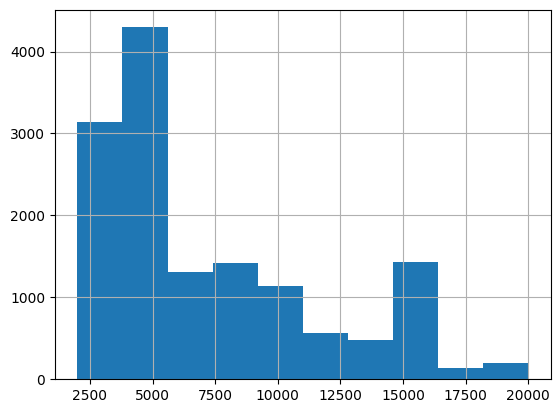

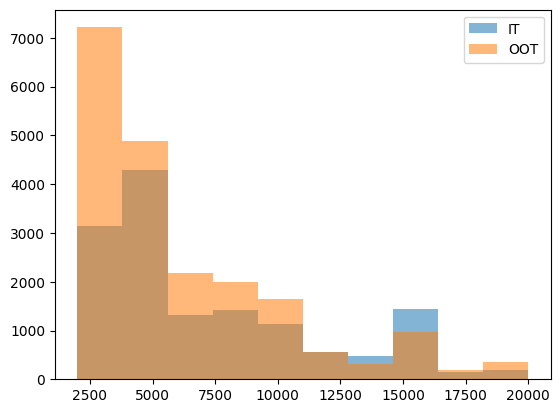

PSI for TotalInquiries


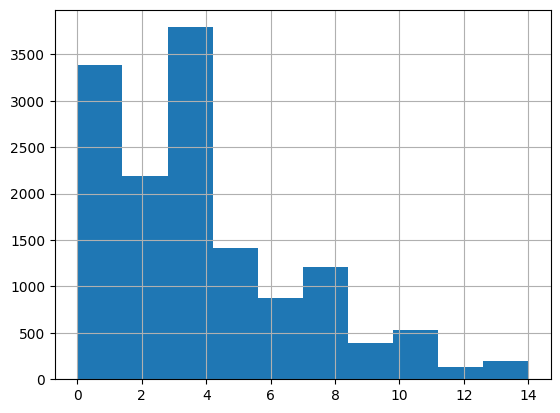

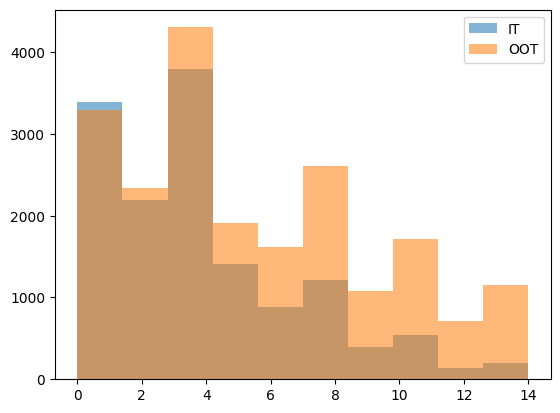

PSI for MonthlyLoanPayment


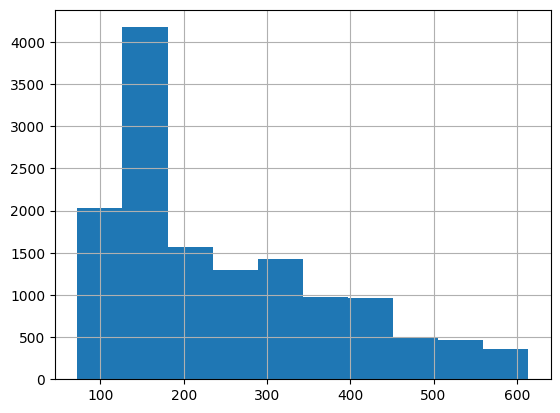

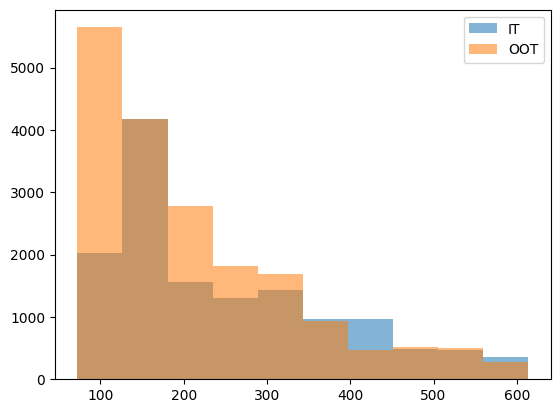

PSI for Term


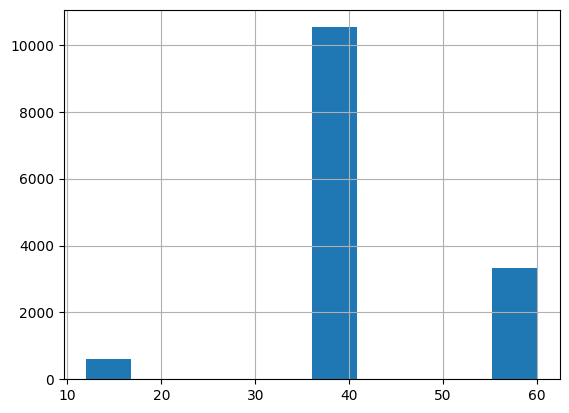

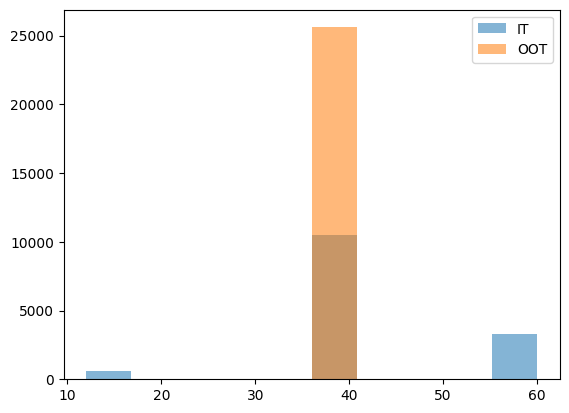

PSI for EmploymentStatusDuration


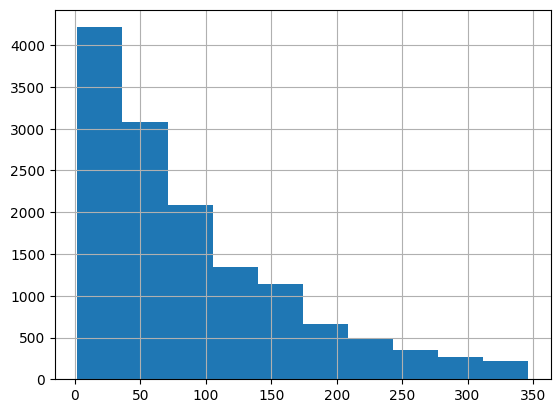

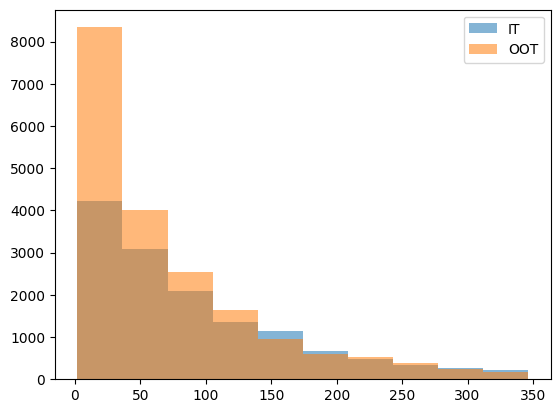

PSI for ListingCategory (numeric)


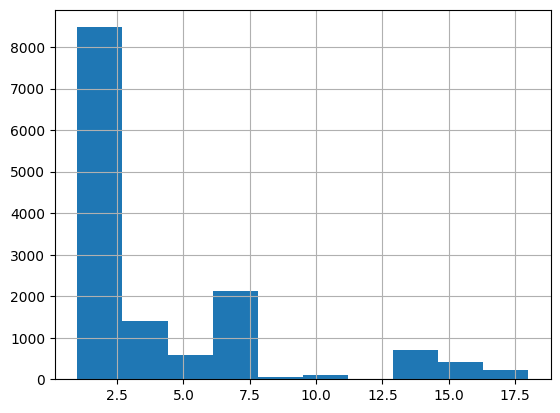

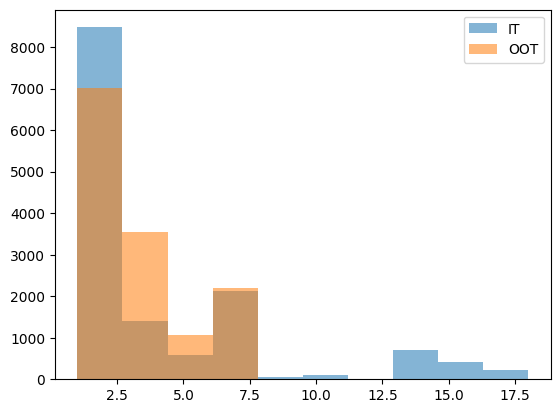

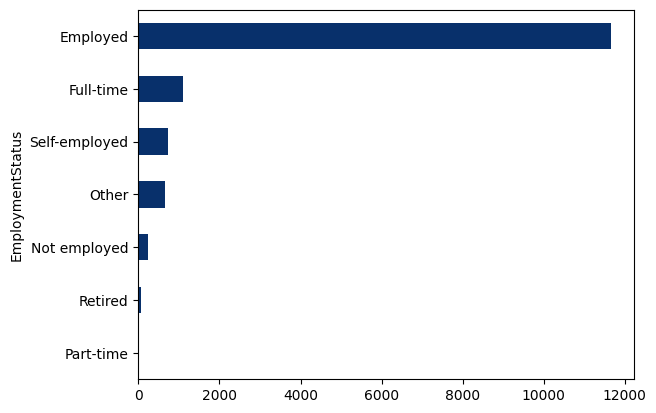

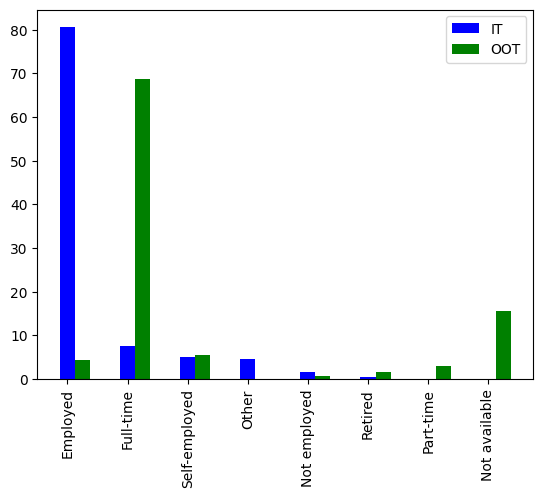

In [132]:
for feature in rare_psi:
    if feature not in df_categoricas.columns:
        print(f'PSI for {feature}')
        desc_num(df, df_oot, feature)
    else:
        desc_cat(df, df_oot, feature)

In [133]:
df.loc[df.EmploymentStatus == 'Full-time', 'EmploymentStatus'] = 'Employed'
df_val.loc[df_val.EmploymentStatus == 'Full-time', 'EmploymentStatus'] = 'Employed'
df_oot.loc[df_oot.EmploymentStatus == 'Full-time', 'EmploymentStatus'] = 'Employed'
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
c = ['EmploymentStatus']
col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)
ret_psi = PSI_categorical(col_series.iloc[:,0], it_oot_series)
print ('With the new definition of {} the PSI is {}'.format(c, ret_psi))

# Update the PSI estimation
df_psi.loc[df_psi.feature=='EmploymentStatus', 'PSI'] = ret_psi

With the new definition of ['EmploymentStatus'] the PSI is 0.31644723062211033


In [134]:
features_psi = df_psi[df_psi['PSI'] < 0.25]['feature']

#### Dentro de las variables con un PSI demasiado alto, es decir variables muy inestables, se encuentra Employment Status que su cambio en la distribucion no parece ser debido a la naturaleza de la variable sino a un cambio de la nomenclatura, se procede a ajustarla y el PSI se reduce considerablemente dentro de margentes aceptables, el resto cambia demasiado su distribucion por lo que no las utilizariamos

#### La que presenta mas diferencias es Term lo cual tiene sentido dado que nuestro In Time al ser posterior a nuestro Out of Time va a tener prestamos con una madurez menor

In [135]:
cat_features = [f for f in features if f in df.select_dtypes(include=['object', 'category']).describe().T.index]

In [136]:
num_features

Index(['Unnamed: 0', 'ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore',
       'ListingCategory (numeric)', 'EmploymentStatusDuration',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       '

In [137]:
num_features = [x for x in num_features if x not in ['Unnamed: 0', 'ListingNumber']]

[('BorrowerAPR',
  7,
  BorrowerRate               0.991072
  LenderYield                0.991072
  EstimatedEffectiveYield    0.989157
  EstimatedLoss              0.965062
  EstimatedReturn            0.790309
  ProsperRating (numeric)    0.970203
  ProsperScore               0.782434
  Name: BorrowerAPR, dtype: float64),
 ('BorrowerRate',
  7,
  BorrowerAPR                0.991072
  LenderYield                1.000000
  EstimatedEffectiveYield    0.998677
  EstimatedLoss              0.955105
  EstimatedReturn            0.829482
  ProsperRating (numeric)    0.956462
  ProsperScore               0.769829
  Name: BorrowerRate, dtype: float64),
 ('LenderYield',
  7,
  BorrowerAPR                0.991072
  BorrowerRate               1.000000
  EstimatedEffectiveYield    0.998677
  EstimatedLoss              0.955105
  EstimatedReturn            0.829482
  ProsperRating (numeric)    0.956462
  ProsperScore               0.769829
  Name: LenderYield, dtype: float64),
 ('EstimatedEffectiv

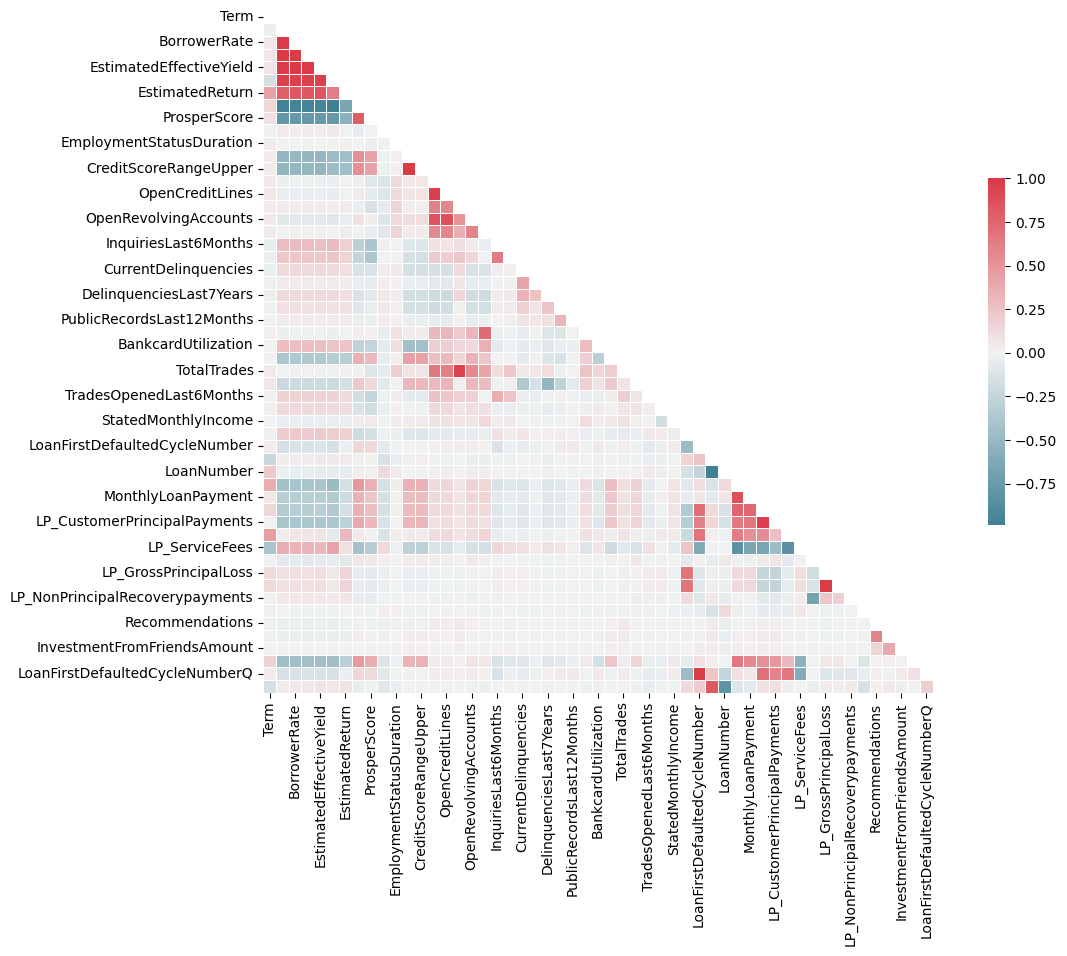

In [138]:
# Compute the correlation matrix
corr = df[num_features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr_TH = 0.75
n_corr_list = []
corr_feats_list = []
for f in num_features:
    #get correlation entries for the feature
    corr_f = corr[f][[col for col in num_features if col!=f]]
    #work with absolute value
    corr_f_abs = corr_f.abs()
    #get features above corr TH
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)

    
corr_data = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, num_features) if n>0]
corr_data

In [139]:
#run through the iv ranking, and drop features if they are correlated with any feature with better ranking
feats_sorted = df_iv.feature.values.tolist()

def get_uncorr_feats(corr_data, feats_sorted):
    """Handles the corr_data structure, to drop highlly correlated features

    Args:
        corr_data: List of tuples containing the correlation info
        feats_sorted: List, with the features to be sorted / dropped

    Returns:
        List with the features that have no correlation
    """
    features_keep = feats_sorted[:1]
    for feat in feats_sorted[1:]:
        #capture the correlation tuple
        crr_data = [crr for crr in corr_data if crr[0] == feat] # if feat has correlation

        if len(crr_data):
            #if there is a 'hit' with a feature in features_keep, do not include it
            hit = len(set(crr_data[0][2].index.tolist()) & set(features_keep)) > 0
            if hit:
                print ('Drop: ' + feat)
            else:
                features_keep.append(feat)
        else:
            features_keep.append(feat)
    return features_keep

print ('We are dropping the following features due to the high correlation with others:\n')
features_keep = get_uncorr_feats(corr_data, feats_sorted)

We are dropping the following features due to the high correlation with others:

Drop: CreditScoreRangeUpper
Drop: LoanOriginalAmount
Drop: OpenCreditLines
Drop: CurrentCreditLines
Drop: TotalCreditLinespast7years


In [140]:
final_features = [feature for feature in df.columns if feature in features_keep  and feature not in rare_psi]
final_features

['Term',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CreditScoreRangeLower',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'IncomeRange',
 'IncomeVerifiable',
 'StatedMonthlyIncome',
 'MonthlyLoanPayment',
 'PercentFunded',
 'Recommendations']

### Bucketing

In [141]:
def get_bucket_numfeature(df, feat_col, n_bins, input_slider=(0., 100.)):
    """Cuts a numeric feature in 'n_bins', balacing data in percentiles

    Args:
        df: Pandas DataFrame with the input data
        feat_col: Name of the column with the input feature
        obj_col: Name of the column with the target
        n_bins: Number of cuts expected
        input_slider: Range considered for the bucketing

    Returns:
        List with the cuts corresponding to this feature
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[feat_col]]
    cuts = df_cut[feat_col].quantile(np.linspace(perc_sliders[0], perc_sliders[1], n_bins + 1)).values.tolist()
    cuts = sorted(list(set(cuts)))
    return cuts

def format_dummy_col(feat_col, dummy_col):
    """Handles column names for dummy data

    Args:
        feat_col: Name of the column with the input feature
        dummy_col: String of the dummy column

    Returns:
        Dummy column with better formatting
    """
    out = dummy_col.replace("(", "")\
                   .replace("]", "")\
                   .replace(".0", "")\
                   .replace(", ", "|")

    return feat_col + '_' + out

def apply_bucketing_num(df, feat_col, cuts):
    """Applies bucketing to numerical feature

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        cuts: Cuts that will be applied to the input data

    Returns:
        Pandas dataframe with dummy columns
    """
    cut_col = '{}_cut'.format(feat_col)
    if len(cuts) == 2:
        cuts = [cuts[0], np.mean(cuts), cuts[1]]

    df[cut_col] = pd.cut(df[feat_col], cuts, include_lowest=True, precision=0)
    if df[cut_col].isna().any():
        df[cut_col] = df[cut_col].cat.add_categories(["NA"])
        df[cut_col] = df[cut_col].fillna("NA")

    dummies_df = pd.get_dummies(df[cut_col], drop_first=True)
    print(dummies_df)
    dummies_df.columns = [format_dummy_col(feat_col, str(col)) for col in dummies_df.columns.values.tolist()]

    return dummies_df

In [142]:
def get_bucket_catfeature(df, feat_col, n_bins):
    """Cuts a categorical feature in 'n_bins', keeping categories with highest volume

    Args:
        df: Pandas DataFrame with the input data
        feat_col: Name of the column with the input feature
        n_bins: Number of cuts expected

    Returns:
        List with the cuts corresponding to this feature
    """
    cuts = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()

    return cuts

def apply_bucketing_cat(df, feat_col, cuts):
    """Applies bucketing to categorical feature

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        cuts: Cuts that will be applied to the input data

    Returns:
        Pandas dataframe with dummy columns
    """
    cut_col = '{}_cut'.format(feat_col)
    df[cut_col] = df[feat_col]
    df.loc[~df[cut_col].isin(cuts), cut_col] = 'Other'
    if df[cut_col].isna().any():
        df[cut_col] = df[cut_col].fillna("NA")

    dummies_df = pd.get_dummies(df[cut_col], prefix=feat_col, drop_first=True)

    return dummies_df

In [143]:
def get_bucket_feature(df, feat_col, n_bins=6):
    """Trains bucketing in a feature, whether if it is numerical
    or categorical

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        n_bins: Cuts that will be applied to the input data

    Returns:
        List with the cuts learned from the data
    """
    if (df[feat_col].dtypes == object) | (df[feat_col].dtypes == bool):
        cuts = get_bucket_catfeature(df, feat_col, n_bins)
    else:
        cuts = get_bucket_numfeature(df, feat_col, n_bins)
    return cuts

def get_bucketing_allfeatures(df, features, n_bins=4):
    """Trains bucketing in all given features of a dataset

    Args:
        df: Pandas Dataframe with the input data
        features: Features which bucketing will be learnt
        n_bins: Cuts that will be applied to the input data

    Returns:
        Dict, containing all features and its corresponding
        bucketing. For example:
         {'feature1': cuts1,
          'feature2': cuts2}
    """
    out_dict = {}
    for feature in features:
        cuts = get_bucket_feature(df, feature, n_bins)
        out_dict[feature] = cuts
    return out_dict

In [144]:
dict_bucketing = get_bucketing_allfeatures(df_train, final_features, n_bins=4)

def apply_bucketing(df, feat_col, cuts):
    """Applies a bucketing schema

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        cuts: Cuts that will be applied to the input data

    Returns:
        Pandas DataFrame with columns dummy columns
    """
    if (df[feat_col].dtypes == object) | (df[feat_col].dtypes == bool):
        df_buck = apply_bucketing_cat(df, feat_col, cuts)
    else:
        df_buck = apply_bucketing_num(df, feat_col, cuts)
    return df_buck

# Apply the bucketing

# Keep each column dummy columns in independent lists
list_df_tr, list_df_val, list_df_oot = [], [], []
for feat in final_features:
    list_df_tr.append(apply_bucketing(df_train, feat, dict_bucketing[feat]))
    list_df_val.append(apply_bucketing(df_val, feat, dict_bucketing[feat]))
    list_df_oot.append(apply_bucketing(df_oot, feat, dict_bucketing[feat]))

# Then 'vertically' combine them
df_tr_preproc = pd.concat(list_df_tr, axis=1)
df_val_preproc = pd.concat(list_df_val, axis=1)
df_oot_preproc = pd.concat(list_df_oot, axis=1)

# Capture the name of all buckets in our dataset
keep_cols_buck = df_tr_preproc.columns

       (36.0, 60.0]
5695          False
70812         False
7939          False
49455         False
74107         False
...             ...
1079          False
76987         False
56283          True
45387          True
23774         False

[14466 rows x 1 columns]
       (36.0, 60.0]
9              True
30            False
33            False
52            False
59            False
...             ...
79677         False
79696         False
79718         False
79736         False
79750         False

[6200 rows x 1 columns]
       (36.0, 60.0]
4             False
6             False
12            False
13            False
17            False
...             ...
79740         False
79742         False
79748         False
79752         False
79754         False

[25639 rows x 1 columns]
       (1.0, 2.0]  (2.0, 7.0]  (7.0, 20.0]
5695        False       False        False
70812       False       False         True
7939        False       False        False
49455       False       False  

In [145]:
#check buckets correlations
corr = df_tr_preproc[keep_cols_buck].corr()
orig_features = keep_cols_buck.values.tolist()
corr_TH = 0.75
n_corr_list=[]
corr_feats_list=[]
for f in orig_features:
    #get correlation entries for the feature
    corr_f = corr[f][[col for col in orig_features if col!=f]]
    #work with absolute value
    corr_f_abs = corr_f.abs()
    #get features above corr TH
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)

corr_buckets = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, orig_features) if n>0]

In [146]:
print ('We are dropping the following buckets due to the high correlation with others:\n')
glm_cols = get_uncorr_feats(corr_buckets, orig_features)

We are dropping the following buckets due to the high correlation with others:

Drop: RevolvingCreditBalance_17480|879891
Drop: IncomeVerifiable_True


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

def get_auc_to_plot(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    return fpr, tpr, metrics.auc(fpr, tpr)

def get_auc(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    return metrics.auc(fpr, tpr)

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [148]:
# Apply the bucketing

# Keep each column dummy columns in independent lists
list_df_tr, list_df_val, list_df_oot = [], [], []
for feat in final_features:
    list_df_tr.append(apply_bucketing(df_train, feat, dict_bucketing[feat]))
    list_df_val.append(apply_bucketing(df_val, feat, dict_bucketing[feat]))
    list_df_oot.append(apply_bucketing(df_oot, feat, dict_bucketing[feat]))

# Then 'vertically' combine them
df_tr_preproc = pd.concat(list_df_tr, axis=1)
df_val_preproc = pd.concat(list_df_val, axis=1)
df_oot_preproc = pd.concat(list_df_oot, axis=1)

# Capture the name of all buckets in our dataset
keep_cols_buck = df_tr_preproc.columns
df_tr_preproc

       (36.0, 60.0]
5695          False
70812         False
7939          False
49455         False
74107         False
...             ...
1079          False
76987         False
56283          True
45387          True
23774         False

[14466 rows x 1 columns]
       (36.0, 60.0]
9              True
30            False
33            False
52            False
59            False
...             ...
79677         False
79696         False
79718         False
79736         False
79750         False

[6200 rows x 1 columns]
       (36.0, 60.0]
4             False
6             False
12            False
13            False
17            False
...             ...
79740         False
79742         False
79748         False
79752         False
79754         False

[25639 rows x 1 columns]
       (1.0, 2.0]  (2.0, 7.0]  (7.0, 20.0]
5695        False       False        False
70812       False       False         True
7939        False       False        False
49455       False       False  

,Term_36|60,ListingCategory (numeric)_1|2,ListingCategory (numeric)_2|7,ListingCategory (numeric)_7|20,BorrowerState_FL,BorrowerState_NY,BorrowerState_Other,BorrowerState_TX,Occupation_Executive,Occupation_Other,...,IncomeRange_Other,IncomeVerifiable_True,StatedMonthlyIncome_3167|4667,StatedMonthlyIncome_4667|7000,StatedMonthlyIncome_7000|1750003,MonthlyLoanPayment_152|201,MonthlyLoanPayment_201|342,MonthlyLoanPayment_342|2219,PercentFunded_0.8|1,Recommendations_9|18
5695,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,True,False,True,False
70812,False,False,False,True,False,False,True,False,False,True,...,False,True,True,False,False,False,False,False,True,False
7939,False,False,False,False,False,True,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
49455,False,False,False,False,False,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
74107,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
76987,False,True,False,False,False,False,True,False,False,True,...,False,True,False,True,False,False,False,True,True,False
56283,True,True,False,False,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,True,False
45387,True,False,True,False,False,False,True,False,False,False,...,False,True,True,False,False,False,True,False,True,False


#### Finalmente las variables seleccionadas son aquellas que tienen un PSI e IV aceptables ademas de no estar correlacionadas entre si y luego al aplicar un bucketing nos tiramos los buckets que esten muy correlacionados que en este caso son solo 2 lo cual tiene sentido ya que antes nos habiamos tirado las variables correalacionadas

## Modeling

In [149]:
# Capture train, test and validation
y_tr, y_val, y_oot = df_train['bad'], df_val['bad'], df_oot['bad']
X_train, X_val, X_oot = df_tr_preproc[glm_cols], df_val_preproc[glm_cols], df_oot_preproc[glm_cols]

In [150]:
# Train a LogisticRegressioN
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_tr)

LogisticRegression()

In [151]:
# Predicciones de probabilidades para todos los subconjuntos
pred_tr = model.predict_proba(X_train)[:, 1]
pred_val = model.predict_proba(X_val)[:, 1]
pred_oot = model.predict_proba(X_oot)[:, 1]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Umbral para el corte

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    
    pred_tr_binary = (pred_tr >= threshold).astype(int)
    pred_val_binary = (pred_val >= threshold).astype(int)
    pred_oot_binary = (pred_oot >= threshold).astype(int)

    precision_tr = precision_score(y_tr, pred_tr_binary)
    recall_tr = recall_score(y_tr, pred_tr_binary)
    f1_tr = f1_score(y_tr, pred_tr_binary)

    precision_val = precision_score(y_val, pred_val_binary)
    recall_val = recall_score(y_val, pred_val_binary)
    f1_val = f1_score(y_val, pred_val_binary)

    precision_oot = precision_score(y_oot, pred_oot_binary)
    recall_oot = recall_score(y_oot, pred_oot_binary)
    f1_oot = f1_score(y_oot, pred_oot_binary)

    print(f"Umbral {threshold:.1f}:")
    print(f"  Entrenamiento - Precision: {precision_tr:.4f}, Recall: {recall_tr:.4f}, F1: {f1_tr:.4f}")
    print(f"  Validación - Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1: {f1_val:.4f}")
    print(f"  OOT - Precision: {precision_oot:.4f}, Recall: {recall_oot:.4f}, F1: {f1_oot:.4f}")

Umbral 0.1:
  Entrenamiento - Precision: 0.1665, Recall: 0.7043, F1: 0.2694
  Validación - Precision: 0.1614, Recall: 0.7052, F1: 0.2627
  OOT - Precision: 0.2149, Recall: 0.8340, F1: 0.3417
Umbral 0.2:
  Entrenamiento - Precision: 0.2479, Recall: 0.2267, F1: 0.2368
  Validación - Precision: 0.2193, Recall: 0.2173, F1: 0.2183
  OOT - Precision: 0.2674, Recall: 0.4975, F1: 0.3479
Umbral 0.3:
  Entrenamiento - Precision: 0.3125, Recall: 0.0511, F1: 0.0878
  Validación - Precision: 0.3276, Recall: 0.0578, F1: 0.0982
  OOT - Precision: 0.3003, Recall: 0.2353, F1: 0.2638
Umbral 0.4:
  Entrenamiento - Precision: 0.3846, Recall: 0.0096, F1: 0.0187
  Validación - Precision: 0.4286, Recall: 0.0091, F1: 0.0179
  OOT - Precision: 0.3513, Recall: 0.0878, F1: 0.1405
Umbral 0.5:
  Entrenamiento - Precision: 0.8000, Recall: 0.0026, F1: 0.0051
  Validación - Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  OOT - Precision: 0.3711, Recall: 0.0165, F1: 0.0315


#### Nos quedariamos con un umbral de 10% para maximizar Recall

In [153]:
# Use the function get_auc to obatin the metrics for the roc_curve
get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)

(0.6923628560396804, 0.680622634120872, 0.6646995192398147)

Plot curve for train


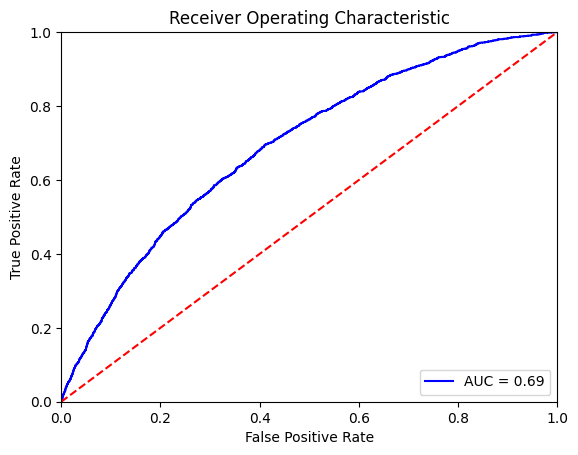

Plot curve for validation


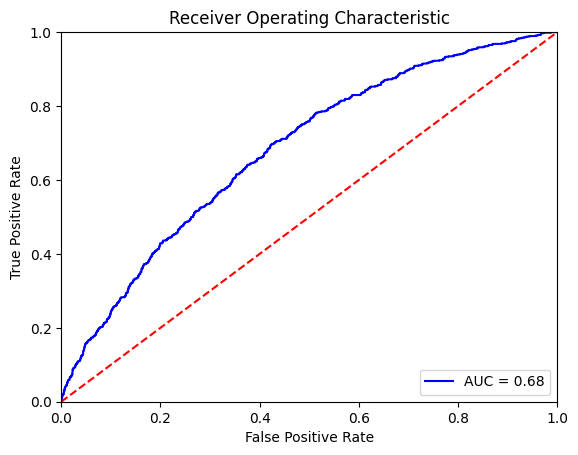

Plot curve for OOT


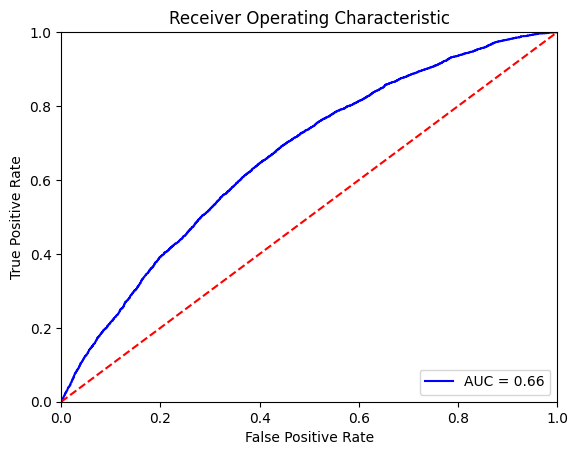

In [154]:
# Make a plot for each split
fpr_tr, tpr_tr, roc_auc_tr = get_auc_to_plot(y_tr, pred_tr)
fpr_val, tpr_val, roc_auc_val = get_auc_to_plot(y_val, pred_val)
fpr_oot, tpr_oot, roc_auc_oot = get_auc_to_plot(y_oot, pred_oot)

print("Plot curve for train")
plot_roc_curve(fpr_tr, tpr_tr, roc_auc_tr)
print("Plot curve for validation")
plot_roc_curve(fpr_val, tpr_val, roc_auc_val)
print("Plot curve for OOT")
plot_roc_curve(fpr_oot, tpr_oot, roc_auc_oot)

#### En base al AUC podemos ver que este modelo no es muy bueno ya que se encuentra bastante lejos de la esquina superior izquierda, esta poco por encima del randomness

In [155]:
print ('Number of features: {}'.format(len(glm_cols)))

Number of features: 66


In [156]:
import scipy.stats as stat

random_seed = 1808

def get_p_vals(lr, X):
    denom = (2.0*(1.0+np.cosh(lr.decision_function(X))))
    denom = np.tile(denom,(X.shape[1],1)).T
    F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
    Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
    z_scores = lr.coef_[0]/sigma_estimates # z-score for each model coefficient
    p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values#
    return p_values

def show_lr_summary(p_values, features, lr):
    df_ret = pd.DataFrame({'feature': features,
                           'p_val': p_values,
                           'betas': lr.coef_.tolist()[0]})[['feature', 'betas', 'p_val']]
    return df_ret

p_values = get_p_vals(model, df_tr_preproc[glm_cols])
print(show_lr_summary(p_values, glm_cols, model))

# remove each bucket with the highest p-value N times
# assess how the AUC changes
N_iterations = len(glm_cols) - 3
glm_cols_pvals = [c for c in glm_cols]

# keep the AUCs in each interation
auc_train, auc_val, auc_oot = [], [], []
# List of tuples where all selected features status will
# be stored per iteration
features_it_pval = []

# for each iteration
for it in range(N_iterations):
    #capture the feature to be dropped
    #in the first iteration we are using the p_values from the model trained 'outside'
    feat_drop = [feat for feat, p in zip(glm_cols_pvals, p_values) if p == max(p_values)][0]
    glm_cols_pvals.remove(feat_drop)
    #re-train the model
    lr_it = LogisticRegression(random_state=random_seed)
    lr_it.fit(df_tr_preproc[glm_cols_pvals], y_tr)
    # Predict for all subsets
    pred_tr = lr_it.predict_proba(df_tr_preproc[glm_cols_pvals])[:, 1]
    pred_val = lr_it.predict_proba(df_val_preproc[glm_cols_pvals])[:, 1]
    pred_oot = lr_it.predict_proba(df_oot_preproc[glm_cols_pvals])[:, 1]
    #get aucs
    auc_train.append(get_auc(y_tr, pred_tr))
    auc_val.append(get_auc(y_val, pred_val))
    auc_oot.append(get_auc(y_oot, pred_oot))
    #get p-values
    p_values = get_p_vals(lr_it, df_tr_preproc[glm_cols_pvals])
    #keep features status at iteration
    features_it_pval.append((it, [c for c in glm_cols_pvals]))

                           feature     betas     p_val
0                       Term_36|60  0.189417  0.006050
1    ListingCategory (numeric)_1|2 -0.107864  0.269669
2    ListingCategory (numeric)_2|7  0.023095  0.727849
3   ListingCategory (numeric)_7|20 -0.071728  0.419757
4                 BorrowerState_FL  0.342526  0.010011
..                             ...       ...       ...
61      MonthlyLoanPayment_152|201  0.164447  0.026545
62      MonthlyLoanPayment_201|342  0.013032  0.871281
63     MonthlyLoanPayment_342|2219 -0.020686  0.822035
64             PercentFunded_0.8|1 -0.181339  0.336334
65            Recommendations_9|18 -0.010225  0.998663

[66 rows x 3 columns]


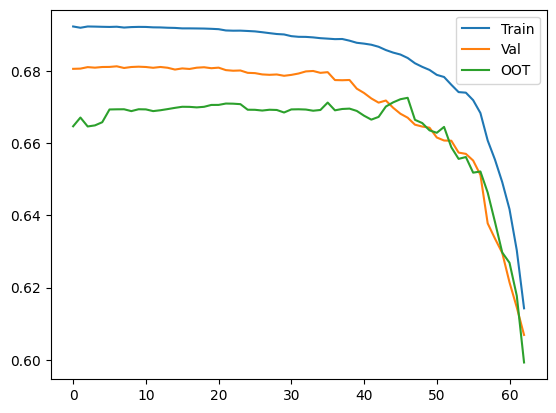

In [157]:
# Plot AUCs in each iteration
iterations = [i for i in range(N_iterations)]
plt.plot(iterations, auc_train, label='Train')
plt.plot(iterations, auc_val, label='Val')
plt.plot(iterations, auc_oot, label='OOT')
plt.legend()

In [158]:
final_features_bucketing = [feats for it, feats in features_it_pval if it==45][0]
final_features_bucketing

['Term_36|60',
 'EmploymentStatus_Other',
 'IsBorrowerHomeowner_True',
 'CreditScoreRangeLower_660|700',
 'CreditScoreRangeLower_700|740',
 'CreditScoreRangeLower_740|880',
 'OpenRevolvingMonthlyPayment_97|235',
 'InquiriesLast6Months_1|2',
 'InquiriesLast6Months_2|27',
 'BankcardUtilization_0.2|0.6',
 'BankcardUtilization_0.6|0.8',
 'BankcardUtilization_0.8|2.2',
 'TradesOpenedLast6Months_1|17',
 'DebtToIncomeRatio_0.3|10',
 'DebtToIncomeRatio_NA',
 'StatedMonthlyIncome_3167|4667',
 'StatedMonthlyIncome_4667|7000',
 'StatedMonthlyIncome_7000|1750003',
 'MonthlyLoanPayment_152|201',
 'PercentFunded_0.8|1']

#### Hasta la iteracion 45 permanece estable

In [159]:
lr_final = LogisticRegression(random_state = random_seed)
lr_final.fit(df_tr_preproc[final_features_bucketing], y_tr)

pred_tr = lr_final.predict_proba(df_tr_preproc[final_features_bucketing])[:, 1]
pred_val = lr_final.predict_proba(df_val_preproc[final_features_bucketing])[:, 1]
pred_oot = lr_final.predict_proba(df_oot_preproc[final_features_bucketing])[:, 1]

In [160]:
get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)

(0.6845867860643322, 0.6681782881537943, 0.6721968333281191)

#### Si bien los AUC de Train y Validation no mejoraron significativamente si lo hizo el <u>Out of Time

Plot curve for train


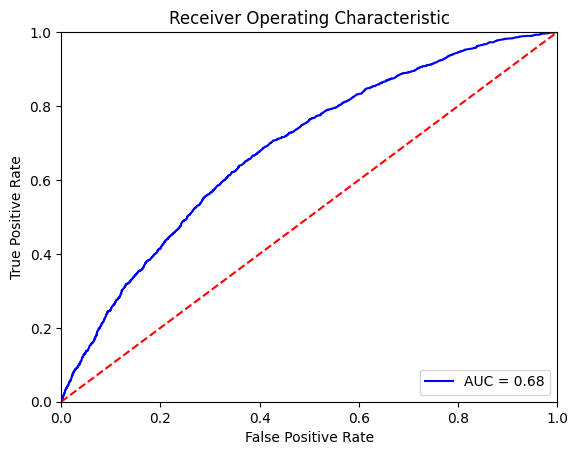

Plot curve for validation


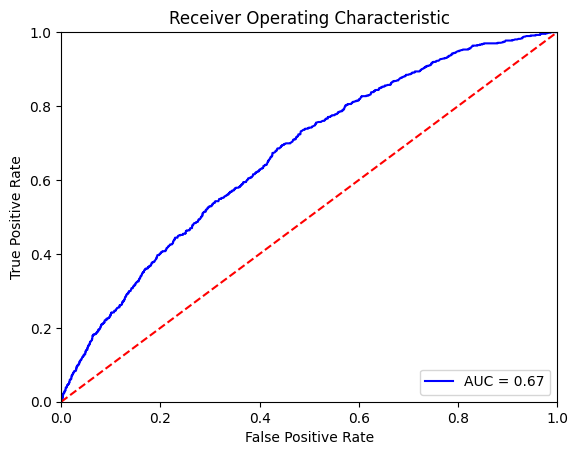

Plot curve for OOT


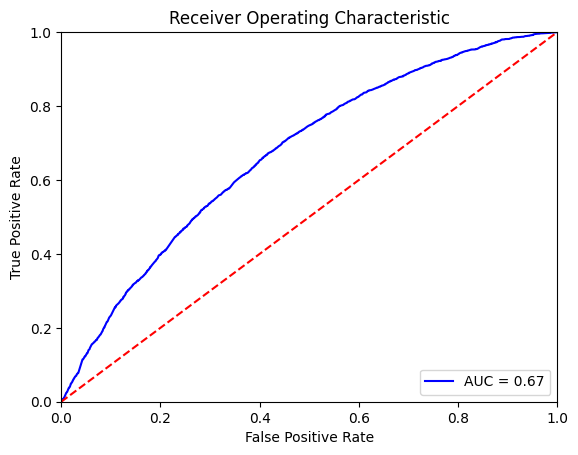

In [161]:
fpr_tr, tpr_tr, roc_auc_tr = get_auc_to_plot(y_tr, pred_tr)
fpr_val, tpr_val, roc_auc_val = get_auc_to_plot(y_val, pred_val)
fpr_oot, tpr_oot, roc_auc_oot = get_auc_to_plot(y_oot, pred_oot)

print("Plot curve for train")
plot_roc_curve(fpr_tr, tpr_tr, roc_auc_tr)
print("Plot curve for validation")
plot_roc_curve(fpr_val, tpr_val, roc_auc_val)
print("Plot curve for OOT")
plot_roc_curve(fpr_oot, tpr_oot, roc_auc_oot)

In [162]:
print ('Number of features: {}'.format(len(final_features_bucketing)))

Number of features: 20


In [163]:
# Try to remove all available features.
# Remove the feature that has the lowest impact in AUC
N_iterations = len(glm_cols) - 3
glm_cols_auc = [c for c in glm_cols]

auc_train, auc_val, auc_oot = [], [], []
features_it_auc = []
for it in range(N_iterations):
    print ('Working for iteration: {}'.format(str(it)))
    #re-train the model
    lr_it = LogisticRegression(random_state=random_seed)
    lr_it.fit(df_tr_preproc[glm_cols_auc], y_tr)
    # Predict for all subsets
    pred_tr = lr_it.predict_proba(df_tr_preproc[glm_cols_auc])[:, 1]
    pred_val = lr_it.predict_proba(df_val_preproc[glm_cols_auc])[:, 1]
    pred_oot = lr_it.predict_proba(df_oot_preproc[glm_cols_auc])[:, 1]
    #get base aucs
    auc_train_it, auc_val_it, auc_oot_it = get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)
    auc_train.append(auc_train_it)
    auc_val.append(auc_val_it)
    auc_oot.append(auc_oot_it)
    #set up minimum gap
    min_gap = 500
    # Drop the feature with the lowest AUC impact
    for feat_eval in glm_cols_auc:
        #use validation AUC only as evaluation metric
        # IMPORTANT!! keep features in iteration it, but the feature under evaluation
        glm_cols_auc_ev = [c for c in glm_cols_auc if c!=feat_eval]
        lr_it_ev = LogisticRegression()
        lr_it_ev.fit(df_tr_preproc[glm_cols_auc_ev], y_tr)
        #predit @ val data
        pred_val = lr_it_ev.predict_proba(df_val_preproc[glm_cols_auc_ev])[:, 1]
        #get auc @ val
        auc_val_it_ev = get_auc(y_val, pred_val)
        #check gap
        gap_val_auc = auc_val_it - auc_val_it_ev
        #capture the feature that has the lowest AUC impact
        if gap_val_auc < min_gap:
            candidate_drop = feat_eval
            min_gap = gap_val_auc
    #remove from the feature set the selected feature
    glm_cols_auc.remove(candidate_drop)
    #keep features status at iteration
    features_it_auc.append((it, [c for c in glm_cols_auc]))

Working for iteration: 0
Working for iteration: 1
Working for iteration: 2
Working for iteration: 3
Working for iteration: 4
Working for iteration: 5
Working for iteration: 6
Working for iteration: 7
Working for iteration: 8
Working for iteration: 9
Working for iteration: 10
Working for iteration: 11
Working for iteration: 12
Working for iteration: 13
Working for iteration: 14
Working for iteration: 15
Working for iteration: 16
Working for iteration: 17
Working for iteration: 18
Working for iteration: 19
Working for iteration: 20
Working for iteration: 21
Working for iteration: 22
Working for iteration: 23
Working for iteration: 24
Working for iteration: 25
Working for iteration: 26
Working for iteration: 27
Working for iteration: 28
Working for iteration: 29
Working for iteration: 30
Working for iteration: 31
Working for iteration: 32
Working for iteration: 33
Working for iteration: 34
Working for iteration: 35
Working for iteration: 36
Working for iteration: 37
Working for iteration:

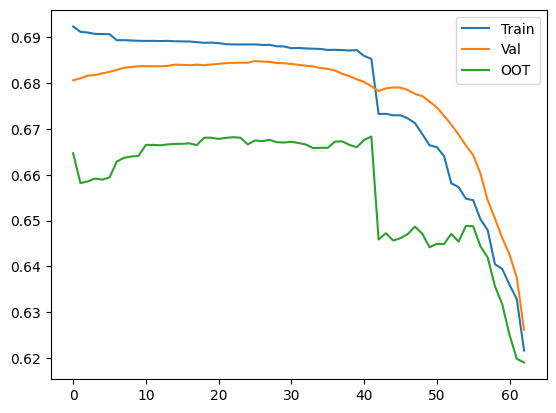

In [164]:
iterations = [i for i in range(N_iterations)]
plt.plot(iterations, auc_train, label='Train')
plt.plot(iterations, auc_val, label='Val')
plt.plot(iterations, auc_oot, label='OOT')
plt.legend();

In [165]:
# get the iteration where it stays stable
final_features_bucketing_auc = [feats for it, feats in features_it_auc if it==40][0]
final_features_bucketing_auc

['Term_36|60',
 'EmploymentStatus_Other',
 'IsBorrowerHomeowner_True',
 'CreditScoreRangeLower_660|700',
 'CreditScoreRangeLower_700|740',
 'CreditScoreRangeLower_740|880',
 'OpenRevolvingAccounts_3|6',
 'OpenRevolvingAccounts_6|9',
 'OpenRevolvingAccounts_9|47',
 'OpenRevolvingMonthlyPayment_97|235',
 'InquiriesLast6Months_1|2',
 'InquiriesLast6Months_2|27',
 'BankcardUtilization_0.2|0.6',
 'BankcardUtilization_0.6|0.8',
 'TotalTrades_21|30',
 'TotalTrades_30|103',
 'TradesOpenedLast6Months_1|17',
 'DebtToIncomeRatio_0.2|0.3',
 'DebtToIncomeRatio_0.3|10',
 'DebtToIncomeRatio_NA',
 'IncomeRange_$25,000-49,999',
 'IncomeRange_$50,000-74,999',
 'IncomeRange_$75,000-99,999',
 'IncomeRange_Other',
 'MonthlyLoanPayment_152|201']

### Logistic Regression

In [166]:
## Call the logistic regression and train it
lr_final= LogisticRegression(random_state=random_seed)
lr_final.fit(df_tr_preproc[final_features_bucketing_auc], y_tr)

LogisticRegression(random_state=1808)

In [178]:
## Obtain the probabilities
pred_tr = lr_final.predict_proba(df_tr_preproc[final_features_bucketing_auc])[:,1]
pred_val = lr_final.predict_proba(df_val_preproc[final_features_bucketing_auc])[:,1]
pred_oot = lr_final.predict_proba(df_oot_preproc[final_features_bucketing_auc])[:,1]

In [179]:
# Umbral para el corte

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    
    pred_tr_binary = (pred_tr >= threshold).astype(int)
    pred_val_binary = (pred_val >= threshold).astype(int)
    pred_oot_binary = (pred_oot >= threshold).astype(int)

    precision_tr = precision_score(y_tr, pred_tr_binary)
    recall_tr = recall_score(y_tr, pred_tr_binary)
    f1_tr = f1_score(y_tr, pred_tr_binary)

    precision_val = precision_score(y_val, pred_val_binary)
    recall_val = recall_score(y_val, pred_val_binary)
    f1_val = f1_score(y_val, pred_val_binary)

    precision_oot = precision_score(y_oot, pred_oot_binary)
    recall_oot = recall_score(y_oot, pred_oot_binary)
    f1_oot = f1_score(y_oot, pred_oot_binary)

    print(f"Umbral {threshold:.1f}:")
    print(f"  Entrenamiento - Precision: {precision_tr:.4f}, Recall: {recall_tr:.4f}, F1: {f1_tr:.4f}")
    print(f"  Validación - Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1: {f1_val:.4f}")
    print(f"  OOT - Precision: {precision_oot:.4f}, Recall: {recall_oot:.4f}, F1: {f1_oot:.4f}")

Umbral 0.1:
  Entrenamiento - Precision: 0.1639, Recall: 0.7095, F1: 0.2663
  Validación - Precision: 0.1595, Recall: 0.7112, F1: 0.2606
  OOT - Precision: 0.2158, Recall: 0.8342, F1: 0.3429
Umbral 0.2:
  Entrenamiento - Precision: 0.2428, Recall: 0.2095, F1: 0.2249
  Validación - Precision: 0.2291, Recall: 0.2036, F1: 0.2156
  OOT - Precision: 0.2790, Recall: 0.4348, F1: 0.3399
Umbral 0.3:
  Entrenamiento - Precision: 0.3027, Recall: 0.0358, F1: 0.0640
  Validación - Precision: 0.3542, Recall: 0.0517, F1: 0.0902
  OOT - Precision: 0.3271, Recall: 0.1191, F1: 0.1746
Umbral 0.4:
  Entrenamiento - Precision: 0.3636, Recall: 0.0051, F1: 0.0101
  Validación - Precision: 0.1000, Recall: 0.0015, F1: 0.0030
  OOT - Precision: 0.3197, Recall: 0.0089, F1: 0.0173
Umbral 0.5:
  Entrenamiento - Precision: 1.0000, Recall: 0.0013, F1: 0.0026
  Validación - Precision: 0.0000, Recall: 0.0000, F1: 0.0000
  OOT - Precision: 0.0000, Recall: 0.0000, F1: 0.0000


#### Como se puede visualizar, hemos mejorado de 0.70 aprox a un Recall de 0.83 en nuestro OOT mediante el ajuste de nuestras variables con p-values y AUC

In [168]:
## Obtain metrics for this model

get_auc(y_tr, pred_tr), get_auc(y_val, pred_val) , get_auc(y_oot, pred_oot)

(0.6853027017929451, 0.6793244513573606, 0.6683414950860154)

Plot curve for train


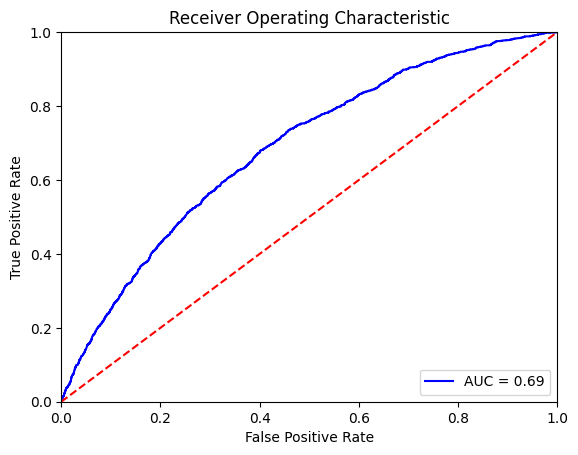

Plot curve for validation


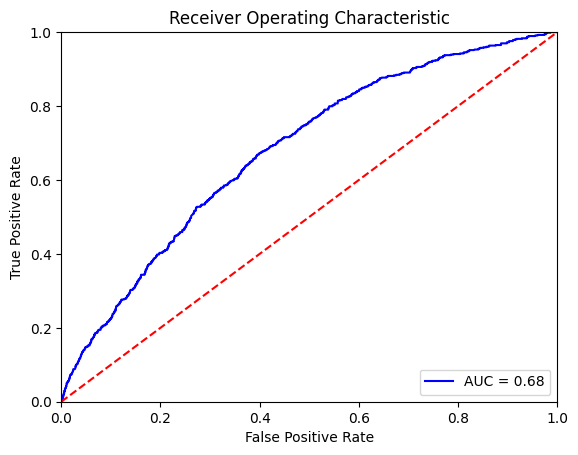

Plot curve for OOT


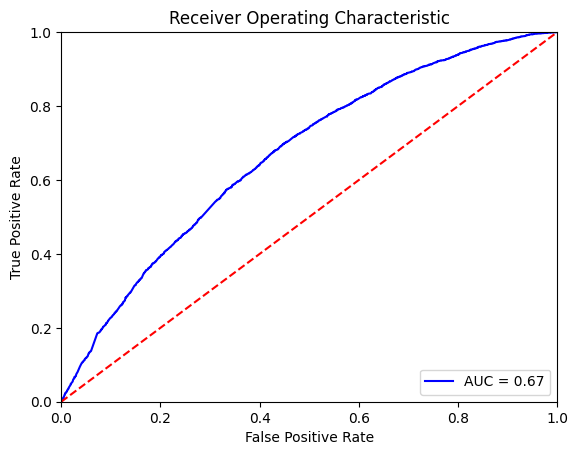

In [169]:
fpr_tr, tpr_tr, roc_auc_tr = get_auc_to_plot(y_tr, pred_tr)
fpr_val, tpr_val, roc_auc_val = get_auc_to_plot(y_val, pred_val)
fpr_oot, tpr_oot, roc_auc_oot = get_auc_to_plot(y_oot, pred_oot)

print("Plot curve for train")
plot_roc_curve(fpr_tr, tpr_tr, roc_auc_tr)
print("Plot curve for validation")
plot_roc_curve(fpr_val, tpr_val, roc_auc_val)
print("Plot curve for OOT")
plot_roc_curve(fpr_oot, tpr_oot, roc_auc_oot)

### Gain Table

In [170]:
def get_gain_table_cami(pred, df, col_target='bad', n_buckets=10):
    """Generate the gain table given a population, and its predictions

    Args:
        pred: np.array / pd.Series containing predictions
        df: Pandas DataFrame containing the population to be assessed
        col_target: Name of the target column
        n_buckets: Number of buckets for the gain table

    Returns:
        Pandas DataFrame representing the gain table
    """
    df = df.copy()
    df['score'] = pred
    df['bucket'] = pd.qcut(df['score'], q=n_buckets, labels=False, duplicates='drop')

    gain_table = df.groupby('bucket').agg(
        total_population=('score', 'count'),
        bad_population=(col_target, 'sum')
    ).reset_index()

    gain_table = gain_table.sort_values(by='bucket', ascending=False)
    gain_table['cum_bad'] = gain_table['bad_population'].cumsum()
    gain_table['cum_population'] = gain_table['total_population'].cumsum()
    gain_table['cum_bad_rate'] = gain_table['cum_bad'] / gain_table['bad_population'].sum()
    gain_table['cum_population_rate'] = gain_table['cum_population'] / gain_table['total_population'].sum()

    return gain_table

print('Let´s check the Gain Table on the OOT population:')
get_gain_table_cami(pred_oot, df_oot)

Let´s check the Gain Table on the OOT population:


,bucket,total_population,bad_population,cum_bad,cum_population,cum_bad_rate,cum_population_rate
9,9,2559,851,851,2559,0.194559,0.099809
8,8,2559,685,1536,5118,0.351166,0.199618
7,7,2552,526,2062,7670,0.471422,0.299154
6,6,2586,554,2616,10256,0.598080,0.400016
5,5,2563,467,3083,12819,0.704847,0.499980
4,4,2564,380,3463,15383,0.791724,0.599984
3,3,2561,332,3795,17944,0.867627,0.699871
2,2,2567,252,4047,20511,0.925240,0.799992
1,1,2560,217,4264,23071,0.974851,0.899840
0,0,2568,110,4374,25639,1.000000,1.000000


### Random Forest

In [171]:
dtypes = df_train[final_features].dtypes
num_feats = dtypes[dtypes!=object].index.values.tolist()
cat_feats = dtypes[dtypes==object].index.values.tolist()
def get_nafill_rf_num(df, num_features, gap_min=1e6):
    """Get a dictionary, that will store the value that will be used
    to fill NAs in numeric data.
    Args:
    df: Pandas Dataframe with the input data
    num_features: List with the names of categorical features
    gap_min: Gap between minimum value and filling value
    Returns:
    Dictionary, with the following structure:
    {feature1: fill_val1,
    feature2: fill_val2}
    """
    dict_fill = {}
    for num_feat in num_features:
        dict_fill[num_feat] = df[num_feat].min() - gap_min
    return dict_fill

def apply_nafill_rf_num(df, dict_fillrf):
    """Given a dictionary with the values to be used in NA filling,
    use it to fill NAs.
    Args:
    df: Pandas Dataframe with the input data
    dict_fillrf: Dictionary, that stores filling values
    Returns:
    Pandas Dataframe with NA being filled
    """
    df_out = df.copy()
    for num_feat in dict_fillrf.keys():
        df_out.loc[df_out[num_feat].isna(), num_feat] = dict_fillrf[num_feat]
    return df_out

In [172]:
#get dictionary to fill values from train
dict_nafill = get_nafill_rf_num(df_train, num_feats)
#apply it to train, val and oot
df_train_fill = apply_nafill_rf_num(df_train, dict_nafill)
df_val_fill = apply_nafill_rf_num(df_val, dict_nafill)
df_oot_fill = apply_nafill_rf_num(df_oot, dict_nafill)
# Keep each column dummy columns in independent lists
# Initialize with the numeric data already filled
list_df_tr, list_df_val, list_df_oot = [df_train_fill[num_feats]], [df_val_fill[num_feats]], [df_oot_fill[num_feats]]
# Add the bucketing results of categorical data
for feat in cat_feats:
    list_df_tr.append(apply_bucketing(df_train, feat, dict_bucketing[feat]))
    list_df_val.append(apply_bucketing(df_val, feat, dict_bucketing[feat]))
    list_df_oot.append(apply_bucketing(df_oot, feat, dict_bucketing[feat]))
# Then combine them column-wise
df_tr_preproc_rf = pd.concat(list_df_tr, axis=1)
df_val_preproc_rf = pd.concat(list_df_val, axis=1)
df_oot_preproc_rf = pd.concat(list_df_oot, axis=1)
# Keep the final column names
keep_cols_rf = df_tr_preproc_rf.columns

In [173]:
# Train a RF-Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,
min_samples_leaf=300,
max_depth=4,
n_jobs=4,
random_state=random_seed)
rf.fit(df_tr_preproc_rf[keep_cols_rf], y_tr)

RandomForestClassifier(max_depth=4, min_samples_leaf=300, n_estimators=500,
                       n_jobs=4, random_state=1808)

In [174]:
pred_tr = rf.predict_proba(df_tr_preproc_rf[keep_cols_rf])[:, 1]
pred_val = rf.predict_proba(df_val_preproc_rf[keep_cols_rf])[:, 1]
pred_oot = rf.predict_proba(df_oot_preproc_rf[keep_cols_rf])[:, 1]
get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)

(0.6915086083142753, 0.6664067924520023, 0.6578487430427817)

In [175]:
imp_df = pd.DataFrame({'feature': keep_cols_rf,
'importance': rf.feature_importances_})
print('Number of features: {}'.format(len(imp_df)))
imp_df.sort_values(by='importance', ascending=False)

Number of features: 38


,feature,importance
20,StatedMonthlyIncome,0.220455
18,DebtToIncomeRatio,0.098583
7,InquiriesLast6Months,0.094970
4,CreditScoreRangeLower,0.089104
6,OpenRevolvingMonthlyPayment,0.062300
12,RevolvingCreditBalance,0.060104
19,IncomeVerifiable,0.054978
14,AvailableBankcardCredit,0.051863
21,MonthlyLoanPayment,0.040531
17,TradesOpenedLast6Months,0.040076


#### Hyperparameters Optimization

In [176]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
cv_params = {'n_estimators': [400,500], # The number of trees in the forest
'max_depth': [3,4], # The maximum depth of the tree
'min_samples_leaf': [200,400], # The minimum number of samples required to be at a leaf node
'max_features': [15,20] # The number of features to consider when looking for the best split'
}

In [ ]:
optimized_RF_GS = GridSearchCV(RandomForestClassifier(random_state=random_seed), # Estimator: the model to be evaluated
cv_params, # Param_grid: a dictionary indicating the parameters to be evaluated
scoring = "roc_auc",
cv = 5, # cv: the number of sets into which the data are divided for cross validation
n_jobs = 8) # n_jobs: Number of jobs to run in parallel. -1 means using all processors
optimized_RF_GS.fit(df_tr_preproc_rf[keep_cols_rf], y_tr)

In [ ]:
### Parameters for best model: ###
print('BEST PARAMETERS for RF Classifier:')
optimized_RF_GS.best_params_

BEST PARAMETERS for RF Classifier:


{'max_depth': 4,
 'max_features': 15,
 'min_samples_leaf': 200,
 'n_estimators': 400}

In [ ]:
pred_tr_GS = optimized_RF_GS.predict_proba(df_tr_preproc_rf[keep_cols_rf])[:, 1]
pred_val_GS = optimized_RF_GS.predict_proba(df_val_preproc_rf[keep_cols_rf])[:, 1]
pred_oot_GS = optimized_RF_GS.predict_proba(df_oot_preproc_rf[keep_cols_rf])[:, 1]
get_auc(y_tr, pred_tr_GS), get_auc(y_val, pred_val_GS), get_auc(y_oot, pred_oot_GS)

(0.6957552446860118, 0.6680189632307694, 0.6661264309945125)

### Explicando Resultados

In [ ]:
from sklearn.metrics import precision_score, recall_score

model = lr_final
features = final_features_bucketing_auc
model_tx = 'LR'
thresholds = [0.0913]

print ('LOGISTIC REGRESSION RESULTS\n')
pred_tr = model.predict_proba(df_tr_preproc[features])[:, 1]
pred_val = model.predict_proba(df_val_preproc[features])[:, 1]
pred_oot = model.predict_proba(df_oot_preproc[features])[:, 1]

print ('''- AUC
IT (train)\t{:.2f}
OOS\t\t{:.2f}
OOT\t\t{:.2f}'''\
.format(get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)))
for threshold in thresholds:
    y_pred_OOT = pred_oot > threshold
    print('\n- Precision {} model with {:.3f} threshold:\t{:.2f}'.format(model_tx, threshold, precision_score(y_oot, y_pred_OOT)))
    print('- Recall {} model with {:.3f} threshold:\t\t{:.2f}'.format(model_tx, threshold,recall_score(y_oot, y_pred_OOT)))
print ('\n- Number of features: {}'.format(len(final_features_bucketing_auc)))
print ('\n- Model intercept (bias): {:.2f}'.format(model.intercept_[0]))


pd.DataFrame({'feature':features, 'weight':model.coef_[0]}).sort_values('weight', ascending=False).set_index('feature').head(5)

LOGISTIC REGRESSION RESULTS

- AUC
IT (train)	0.69
OOS		0.68
OOT		0.67

- Precision LR model with 0.091 threshold:	0.21
- Recall LR model with 0.091 threshold:		0.87

- Number of features: 25

- Model intercept (bias): -2.73


,weight
feature,
IncomeRange_Other,0.903905
"IncomeRange_$25,000-49,999",0.865764
DebtToIncomeRatio_NA,0.796927
InquiriesLast6Months_2|27,0.640810
"IncomeRange_$50,000-74,999",0.577228


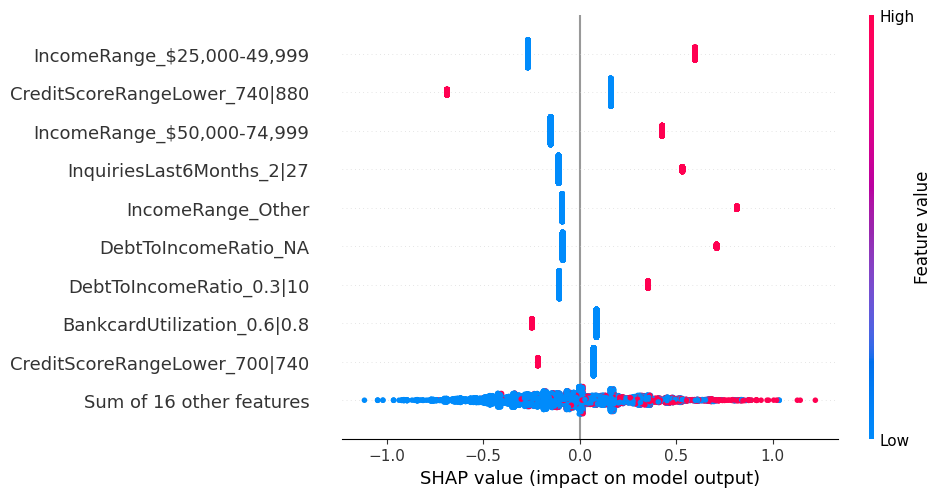

In [ ]:
import shap
explainer = shap.Explainer(
model, df_tr_preproc[features], feature_names=features
)
shap_values = explainer(df_val_preproc[features])
shap.plots.beeswarm(shap_values)

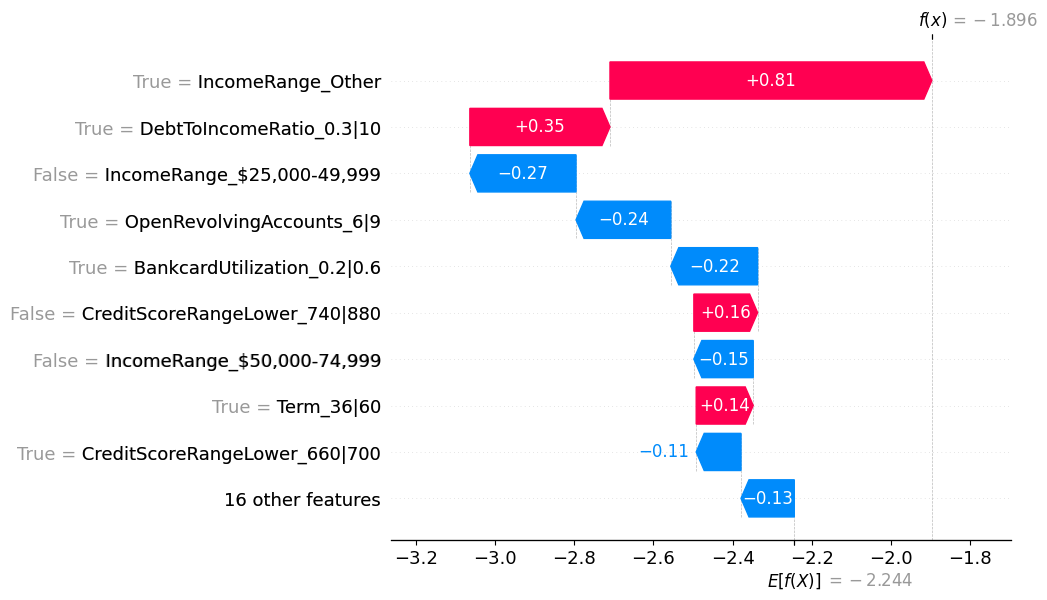

In [ ]:
ind = 0
shap.plots.waterfall(shap_values[ind])